In [51]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [52]:
df=pd.read_csv(r"C:\Users\dell\Downloads\Annual Grades Analysis\student-mat.csv")
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", None)

In [53]:
df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,course,mother,2,2,0,yes,no,no,no,yes,yes,no,no,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,course,father,1,2,0,no,yes,no,no,no,yes,yes,no,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,other,mother,1,2,3,yes,no,yes,no,yes,yes,yes,no,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,home,mother,1,3,0,no,yes,yes,yes,yes,yes,yes,yes,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,home,father,1,2,0,no,yes,yes,no,yes,yes,no,no,4,3,2,1,2,5,4,6,10,10


1. school - student's school (binary: 'GP' - Gabriel Pereira or 'MS' - Mousinho da Silveira)
2. address - student's home address type (binary: 'U' - urban or 'R' - rural)
3. famsize - family size (binary: 'LE3' - less or equal to 3 or 'GT3' - greater than 3)
4. Pstatus - parent's cohabitation status (binary: 'T' - living together or 'A' - apart)
5. Medu - mother's education (numeric: 0 - none, 1 - primary education (4th grade), 2 â€“ 5th to 9th grade, 3 â€“ secondary education or 4 â€“ higher education)
6. Fedu - father's education (numeric: 0 - none, 1 - primary education (4th grade), 2 â€“ 5th to 9th grade, 3 â€“ secondary education or 4 â€“ higher education)
7. Mjob - mother's job (nominal: 'teacher', 'health' care related, civil 'services' (e.g. administrative or police), 'at_home' or 'other')
8. Fjob - father's job (nominal: 'teacher', 'health' care related, civil 'services' (e.g. administrative or police), 'at_home' or 'other')
9. reason - reason to choose this school (nominal: close to 'home', school 'reputation', 'course' preference or 'other')
10. guardian - student's guardian (nominal: 'mother', 'father' or 'other')
11. traveltime - home to school travel time (numeric: 1 - <15 min., 2 - 15 to 30 min., 3 - 30 min. to 1 hour, or 4 - >1 hour)
12. studytime - weekly study time (numeric: 1 - <2 hours, 2 - 2 to 5 hours, 3 - 5 to 10 hours, or 4 - >10 hours)
13. failures - number of past class failures (numeric: n if 1<=n<3, else 4)
14. schoolsup - extra educational support (binary: yes or no)
15. famsup - family educational support (binary: yes or no)
16. paid - extra paid classes within the course subject (Math or Portuguese) (binary: yes or no)
17. activities - extra-curricular activities (binary: yes or no)
18. nursery - attended nursery school (binary: yes or no)
19. higher - wants to take higher education (binary: yes or no)
20. internet - Internet access at home (binary: yes or no)
21. romantic - with a romantic relationship (binary: yes or no)
22. famrel - quality of family relationships (numeric: from 1 - very bad to 5 - excellent)
23. freetime - free time after school (numeric: from 1 - very low to 5 - very high)
24. goout - going out with friends (numeric: from 1 - very low to 5 - very high)
25. Dalc - workday alcohol consumption (numeric: from 1 - very low to 5 - very high)
26. Walc - weekend alcohol consumption (numeric: from 1 - very low to 5 - very high)
27. health - current health status (numeric: from 1 - very bad to 5 - very good)
28. absences - number of school absences (numeric: from 0 to 93)
29. these grades are related with the course subject, Math or Portuguese:
30. G1 - first period grade (numeric: from 0 to 20)
31. G2 - second period grade (numeric: from 0 to 20)
32. G3 - final grade (numeric: from 0 to 20, output target)

In [54]:
df.tail()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
390,MS,M,20,U,LE3,A,2,2,services,services,course,other,1,2,2,no,yes,yes,no,yes,yes,no,no,5,5,4,4,5,4,11,9,9,9
391,MS,M,17,U,LE3,T,3,1,services,services,course,mother,2,1,0,no,no,no,no,no,yes,yes,no,2,4,5,3,4,2,3,14,16,16
392,MS,M,21,R,GT3,T,1,1,other,other,course,other,1,1,3,no,no,no,no,no,yes,no,no,5,5,3,3,3,3,3,10,8,7
393,MS,M,18,R,LE3,T,3,2,services,other,course,mother,3,1,0,no,no,no,no,no,yes,yes,no,4,4,1,3,4,5,0,11,12,10
394,MS,M,19,U,LE3,T,1,1,other,at_home,course,father,1,1,0,no,no,no,no,yes,yes,yes,no,3,2,3,3,3,5,5,8,9,9


In [55]:
df.isna().sum()

school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
G1            0
G2            0
G3            0
dtype: int64

In [56]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,395.0,16.696203,1.276043,15.0,16.0,17.0,18.0,22.0
Medu,395.0,2.749367,1.094735,0.0,2.0,3.0,4.0,4.0
Fedu,395.0,2.521519,1.088201,0.0,2.0,2.0,3.0,4.0
traveltime,395.0,1.448101,0.697505,1.0,1.0,1.0,2.0,4.0
studytime,395.0,2.035443,0.839240,1.0,1.0,2.0,2.0,4.0
failures,395.0,0.334177,0.743651,0.0,0.0,0.0,0.0,3.0
famrel,395.0,3.944304,0.896659,1.0,4.0,4.0,5.0,5.0
freetime,395.0,3.235443,0.998862,1.0,3.0,3.0,4.0,5.0
goout,395.0,3.108861,1.113278,1.0,2.0,3.0,4.0,5.0
Dalc,395.0,1.481013,0.890741,1.0,1.0,1.0,2.0,5.0


In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      395 non-null    object
 1   sex         395 non-null    object
 2   age         395 non-null    int64 
 3   address     395 non-null    object
 4   famsize     395 non-null    object
 5   Pstatus     395 non-null    object
 6   Medu        395 non-null    int64 
 7   Fedu        395 non-null    int64 
 8   Mjob        395 non-null    object
 9   Fjob        395 non-null    object
 10  reason      395 non-null    object
 11  guardian    395 non-null    object
 12  traveltime  395 non-null    int64 
 13  studytime   395 non-null    int64 
 14  failures    395 non-null    int64 
 15  schoolsup   395 non-null    object
 16  famsup      395 non-null    object
 17  paid        395 non-null    object
 18  activities  395 non-null    object
 19  nursery     395 non-null    object
 20  higher    

In [58]:
df.select_dtypes(include=['O']).head()

,school,sex,address,famsize,Pstatus,Mjob,Fjob,reason,guardian,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic
0,GP,F,U,GT3,A,at_home,teacher,course,mother,yes,no,no,no,yes,yes,no,no
1,GP,F,U,GT3,T,at_home,other,course,father,no,yes,no,no,no,yes,yes,no
2,GP,F,U,LE3,T,at_home,other,other,mother,yes,no,yes,no,yes,yes,yes,no
3,GP,F,U,GT3,T,health,services,home,mother,no,yes,yes,yes,yes,yes,yes,yes
4,GP,F,U,GT3,T,other,other,home,father,no,yes,yes,no,yes,yes,no,no


In [59]:
df.school.value_counts()

school
GP    349
MS     46
Name: count, dtype: int64

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


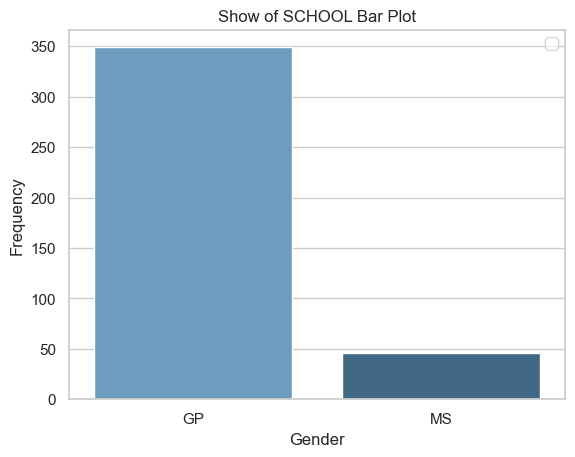

In [60]:
sns.set(style='whitegrid')
ax=sns.barplot(x=df['school'].value_counts().index,y=df['school'].value_counts().values,palette="Blues_d",hue=['GP','MS'])
plt.legend(loc=1)
plt.xlabel('Gender')
plt.ylabel('Frequency')
plt.title('Show of SCHOOL Bar Plot')
plt.show()

In [61]:
df.sex.value_counts()

sex
F    208
M    187
Name: count, dtype: int64

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


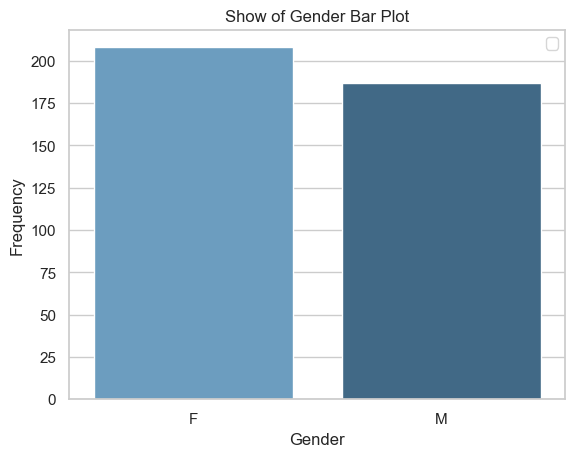

In [62]:
sns.set(style='whitegrid')
ax=sns.barplot(x=df['sex'].value_counts().index,y=df['sex'].value_counts().values,palette="Blues_d",hue=['F','M'])
plt.legend(loc=1)
plt.xlabel('Gender')
plt.ylabel('Frequency')
plt.title('Show of Gender Bar Plot')
plt.show()

In [63]:
df.address.value_counts()

address
U    307
R     88
Name: count, dtype: int64

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


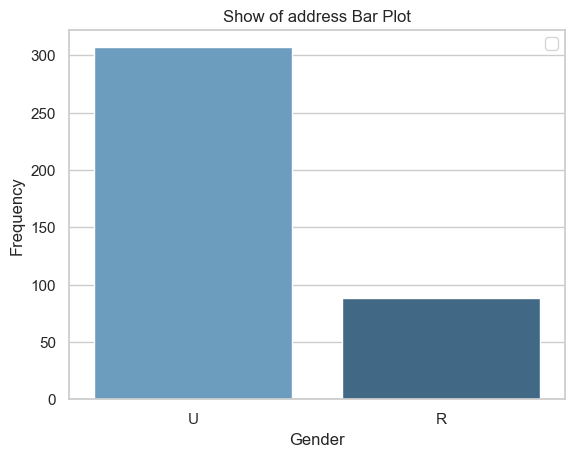

In [64]:
sns.set(style='whitegrid')
ax=sns.barplot(x=df['address'].value_counts().index,y=df['address'].value_counts().values,palette="Blues_d",hue=['U','R'])
plt.legend(loc=1)
plt.xlabel('Gender')
plt.ylabel('Frequency')
plt.title('Show of address Bar Plot')
plt.show()

In [65]:
df.famsize.value_counts()

famsize
GT3    281
LE3    114
Name: count, dtype: int64

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


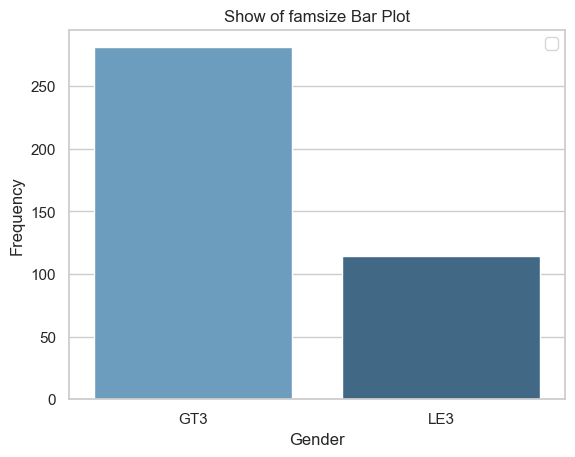

In [66]:
sns.set(style='whitegrid')
ax=sns.barplot(x=df['famsize'].value_counts().index,y=df['famsize'].value_counts().values,palette="Blues_d",hue=['GT3','LE3'])
plt.legend(loc=1)
plt.xlabel('Gender')
plt.ylabel('Frequency')
plt.title('Show of famsize Bar Plot')
plt.show()

In [67]:
df.Pstatus.value_counts()

Pstatus
T    354
A     41
Name: count, dtype: int64

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


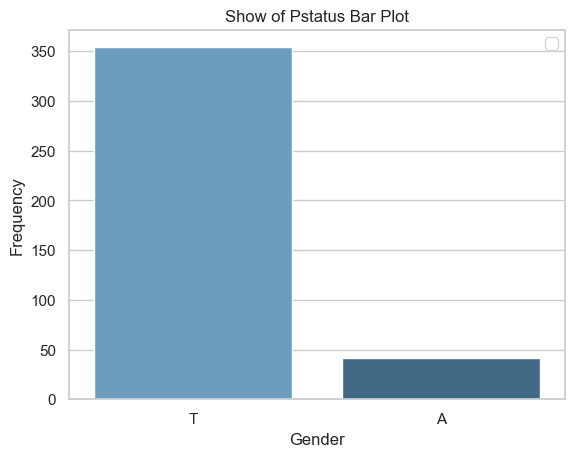

In [68]:
sns.set(style='whitegrid')
ax=sns.barplot(x=df['Pstatus'].value_counts().index,y=df['Pstatus'].value_counts().values,palette="Blues_d",hue=['T','A'])
plt.legend(loc=1)
plt.xlabel('Gender')
plt.ylabel('Frequency')
plt.title('Show of Pstatus Bar Plot')
plt.show()

In [69]:
df.Mjob.value_counts()

Mjob
other       141
services    103
at_home      59
teacher      58
health       34
Name: count, dtype: int64

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


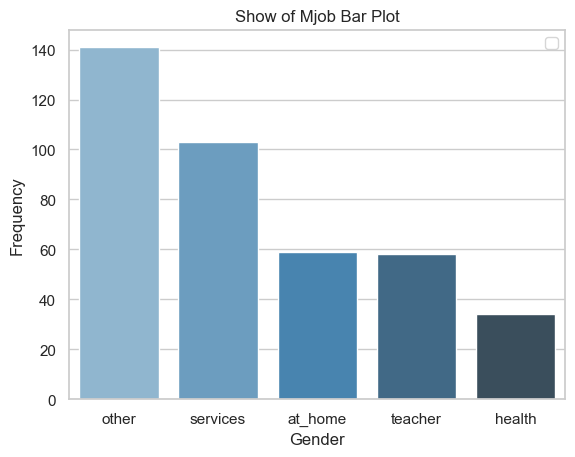

In [70]:
sns.set(style='whitegrid')
ax=sns.barplot(x=df['Mjob'].value_counts().index,y=df['Mjob'].value_counts().values,palette="Blues_d",hue=["other","services","at_home","teacher","health"])
plt.legend(loc=1)
plt.xlabel('Gender')
plt.ylabel('Frequency')
plt.title('Show of Mjob Bar Plot')
plt.show()

In [71]:
df.Fjob.value_counts()

Fjob
other       217
services    111
teacher      29
at_home      20
health       18
Name: count, dtype: int64

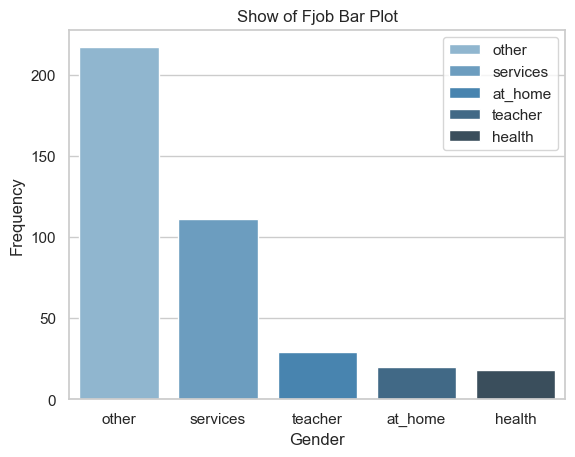

In [72]:
sns.set(style='whitegrid')
ax=sns.barplot(x=df['Fjob'].value_counts().index,y=df['Fjob'].value_counts().values,palette="Blues_d",hue=["other","services","at_home","teacher","health"])
plt.legend(loc=1)
plt.xlabel('Gender')
plt.ylabel('Frequency')
plt.title('Show of Fjob Bar Plot')
plt.show()

In [73]:
df.reason.value_counts()

reason
course        145
home          109
reputation    105
other          36
Name: count, dtype: int64

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


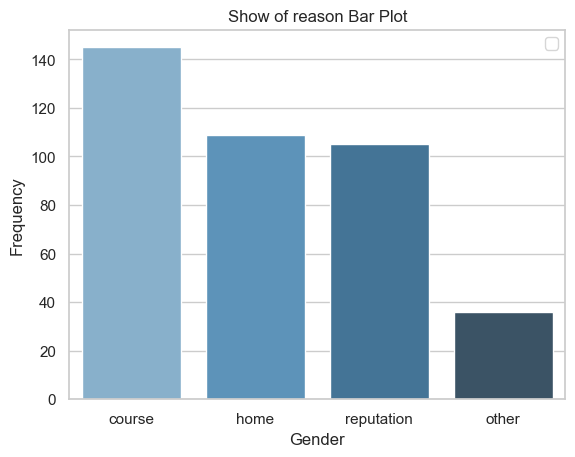

In [74]:
sns.set(style='whitegrid')
ax=sns.barplot(x=df['reason'].value_counts().index,y=df['reason'].value_counts().values,palette="Blues_d",hue=["course","home","reputation","other"])
plt.legend(loc=1)
plt.xlabel('Gender')
plt.ylabel('Frequency')
plt.title('Show of reason Bar Plot')
plt.show()

In [75]:
df.guardian.value_counts()

guardian
mother    273
father     90
other      32
Name: count, dtype: int64

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


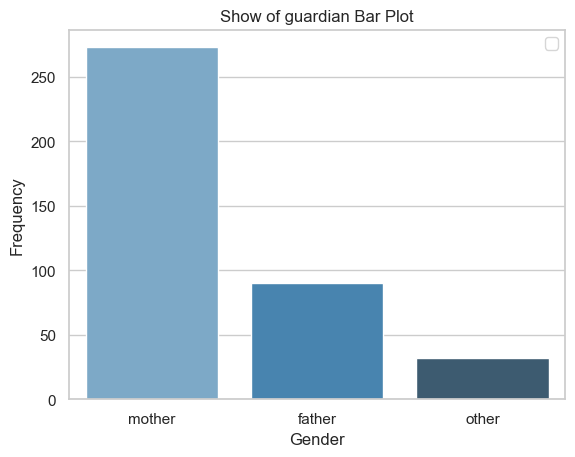

In [76]:
sns.set(style='whitegrid')
ax=sns.barplot(x=df['guardian'].value_counts().index,y=df['guardian'].value_counts().values,palette="Blues_d",hue=["mother","father","other"])
plt.legend(loc=1)
plt.xlabel('Gender')
plt.ylabel('Frequency')
plt.title('Show of guardian Bar Plot')
plt.show()

In [77]:
df.schoolsup.value_counts()

schoolsup
no     344
yes     51
Name: count, dtype: int64

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


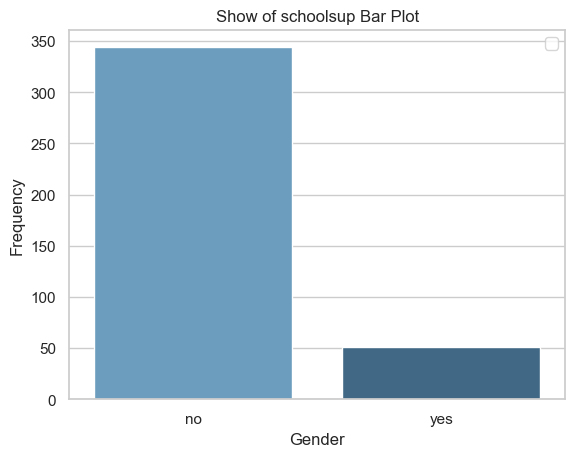

In [78]:
sns.set(style='whitegrid')
ax=sns.barplot(x=df['schoolsup'].value_counts().index,y=df['schoolsup'].value_counts().values,palette="Blues_d",hue=["no","yes"])
plt.legend(loc=1)
plt.xlabel('Gender')
plt.ylabel('Frequency')
plt.title('Show of schoolsup Bar Plot')
plt.show()

In [79]:
df.famsup.value_counts()

famsup
yes    242
no     153
Name: count, dtype: int64

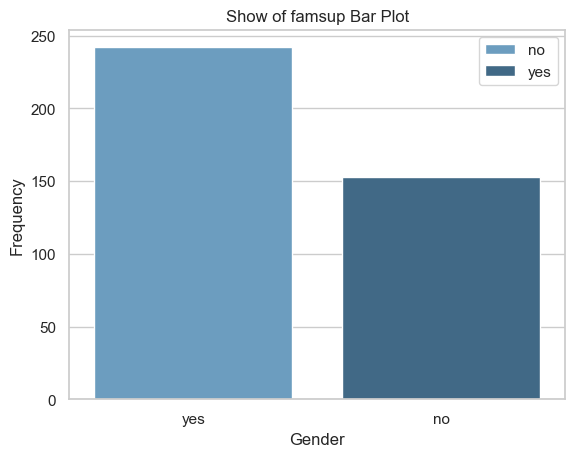

In [80]:
sns.set(style='whitegrid')
ax=sns.barplot(x=df['famsup'].value_counts().index,y=df['famsup'].value_counts().values,palette="Blues_d",hue=["no","yes"])
plt.legend(loc=1)
plt.xlabel('Gender')
plt.ylabel('Frequency')
plt.title('Show of famsup Bar Plot')
plt.show()

In [81]:
df.paid.value_counts()

paid
no     214
yes    181
Name: count, dtype: int64

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


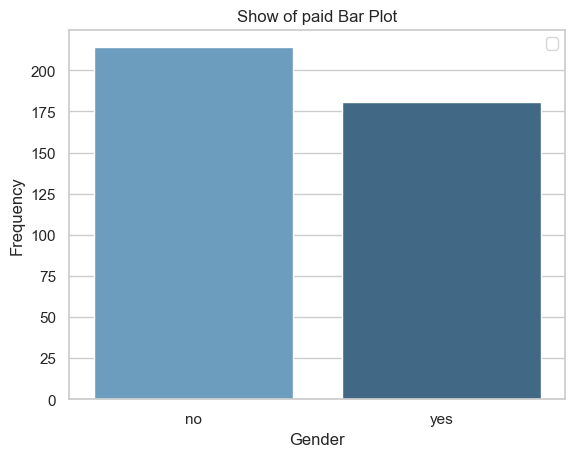

In [82]:
sns.set(style='whitegrid')
ax=sns.barplot(x=df['paid'].value_counts().index,y=df['paid'].value_counts().values,palette="Blues_d",hue=["no","yes"])
plt.legend(loc=1)
plt.xlabel('Gender')
plt.ylabel('Frequency')
plt.title('Show of paid Bar Plot')
plt.show()

In [83]:
df.activities.value_counts()

activities
yes    201
no     194
Name: count, dtype: int64

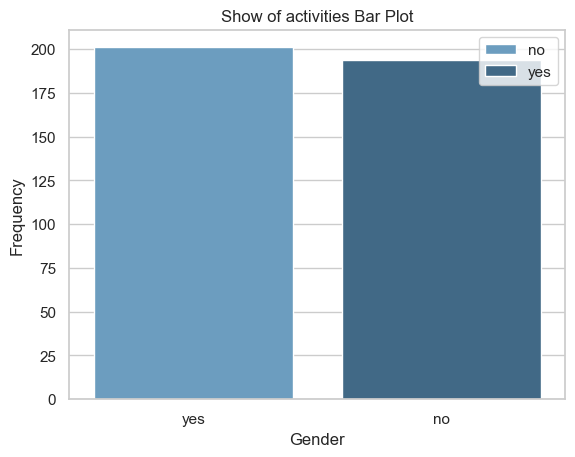

In [84]:
sns.set(style='whitegrid')
ax=sns.barplot(x=df['activities'].value_counts().index,y=df['activities'].value_counts().values,palette="Blues_d",hue=["no","yes"])
plt.legend(loc=1)
plt.xlabel('Gender')
plt.ylabel('Frequency')
plt.title('Show of activities Bar Plot')
plt.show()

In [85]:
df.nursery.value_counts()

nursery
yes    314
no      81
Name: count, dtype: int64

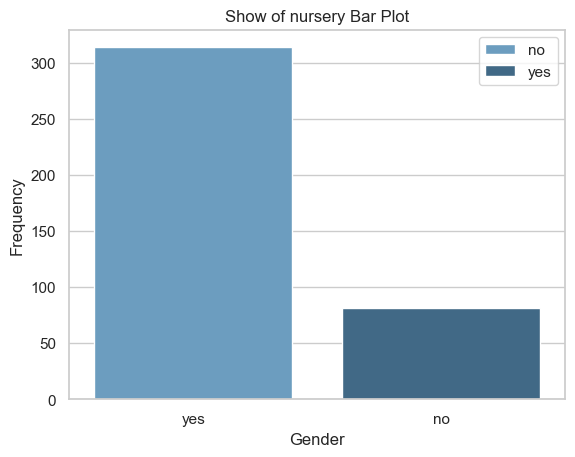

In [86]:
sns.set(style='whitegrid')
ax=sns.barplot(x=df['nursery'].value_counts().index,y=df['nursery'].value_counts().values,palette="Blues_d",hue=["no","yes"])
plt.legend(loc=1)
plt.xlabel('Gender')
plt.ylabel('Frequency')
plt.title('Show of nursery Bar Plot')
plt.show()

In [87]:
df.higher.value_counts()

higher
yes    375
no      20
Name: count, dtype: int64

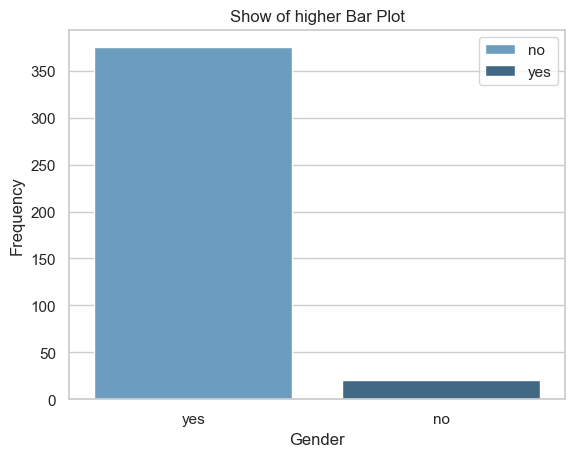

In [88]:
sns.set(style='whitegrid')
ax=sns.barplot(x=df['higher'].value_counts().index,y=df['higher'].value_counts().values,palette="Blues_d",hue=["no","yes"])
plt.legend(loc=1)
plt.xlabel('Gender')
plt.ylabel('Frequency')
plt.title('Show of higher Bar Plot')
plt.show()

In [89]:
df.internet.value_counts()

internet
yes    329
no      66
Name: count, dtype: int64

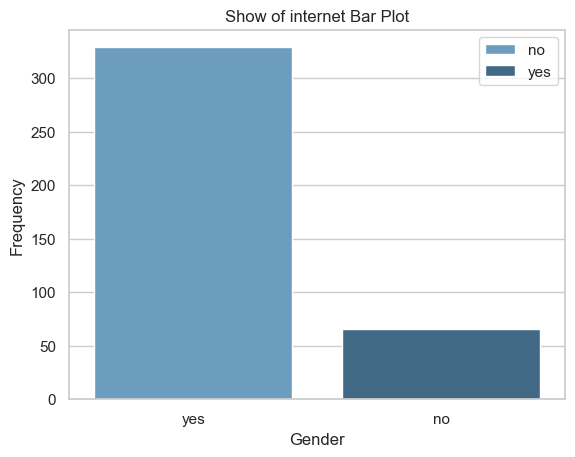

In [90]:
sns.set(style='whitegrid')
ax=sns.barplot(x=df['internet'].value_counts().index,y=df['internet'].value_counts().values,palette="Blues_d",hue=["no","yes"])
plt.legend(loc=1)
plt.xlabel('Gender')
plt.ylabel('Frequency')
plt.title('Show of internet Bar Plot')
plt.show()

In [91]:
df.romantic.value_counts()

romantic
no     263
yes    132
Name: count, dtype: int64

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


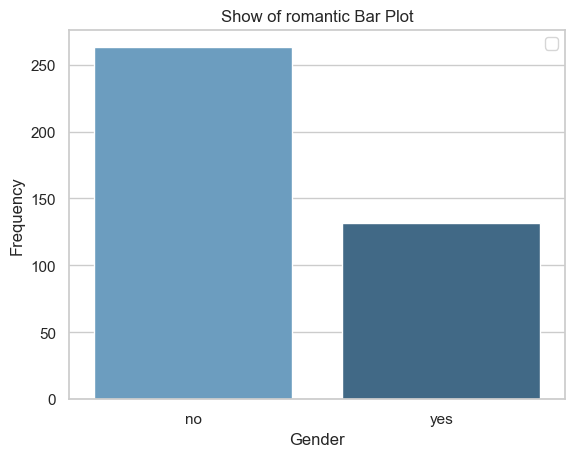

In [92]:
sns.set(style='whitegrid')
ax=sns.barplot(x=df['romantic'].value_counts().index,y=df['romantic'].value_counts().values,palette="Blues_d",hue=["no","yes"])
plt.legend(loc=1)
plt.xlabel('Gender')
plt.ylabel('Frequency')
plt.title('Show of romantic Bar Plot')
plt.show()

In [93]:
# Fixed df.corr() implementation
numeric_df = df.select_dtypes(include=['number'])
correlation_matrix = numeric_df.corr()


In [94]:
df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,course,mother,2,2,0,yes,no,no,no,yes,yes,no,no,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,course,father,1,2,0,no,yes,no,no,no,yes,yes,no,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,other,mother,1,2,3,yes,no,yes,no,yes,yes,yes,no,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,home,mother,1,3,0,no,yes,yes,yes,yes,yes,yes,yes,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,home,father,1,2,0,no,yes,yes,no,yes,yes,no,no,4,3,2,1,2,5,4,6,10,10


In [95]:
df.select_dtypes(include=['number']).head()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,18,4,4,2,2,0,4,3,4,1,1,3,6,5,6,6
1,17,1,1,1,2,0,5,3,3,1,1,3,4,5,5,6
2,15,1,1,1,2,3,4,3,2,2,3,3,10,7,8,10
3,15,4,2,1,3,0,3,2,2,1,1,5,2,15,14,15
4,16,3,3,1,2,0,4,3,2,1,2,5,4,6,10,10


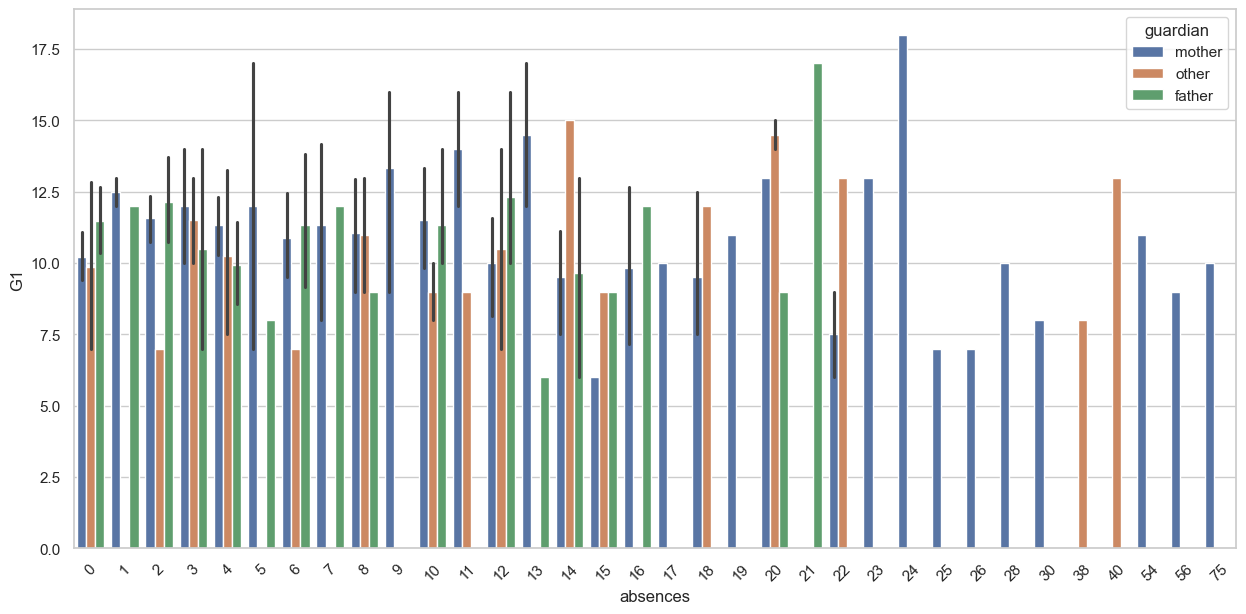

In [96]:
plt.figure(figsize=(15,7))
sns.barplot(x = "absences", y = "G1", hue = "guardian", data = df)
plt.xticks(rotation=45)
plt.show()

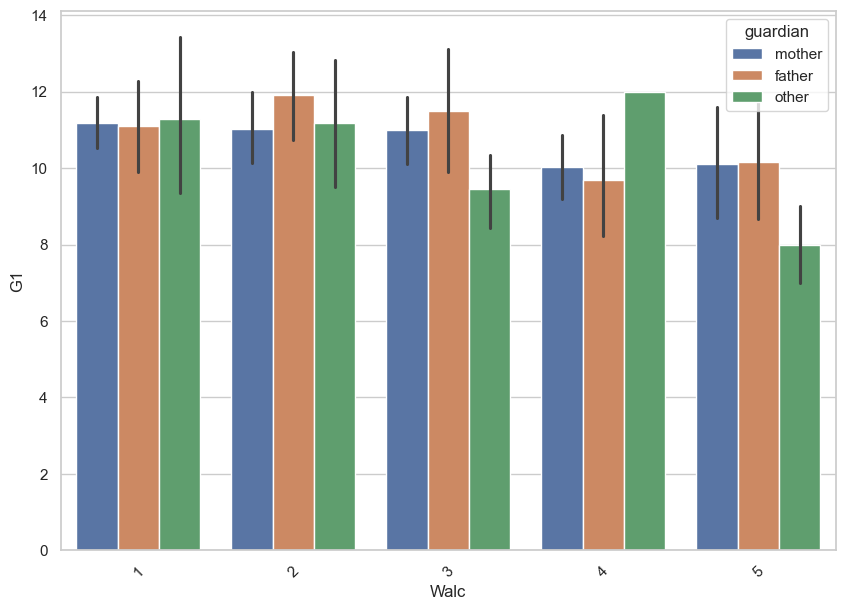

In [97]:
plt.figure(figsize=(10,7))
sns.barplot(x = "Walc", y = "G1", hue = "guardian", data = df)
plt.xticks(rotation=45)
plt.show()

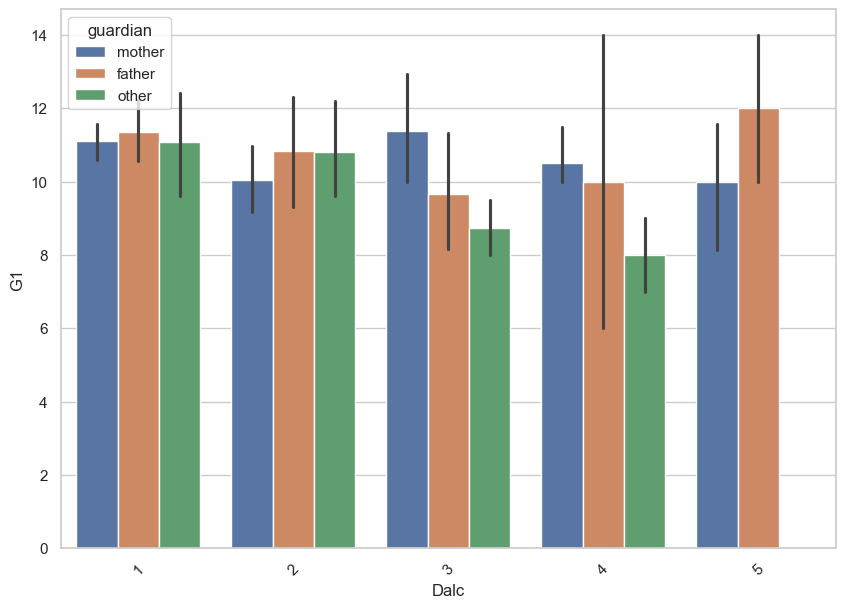

In [98]:
plt.figure(figsize=(10,7))
sns.barplot(x = "Dalc", y = "G1", hue = "guardian", data = df)
plt.xticks(rotation=45)
plt.show()

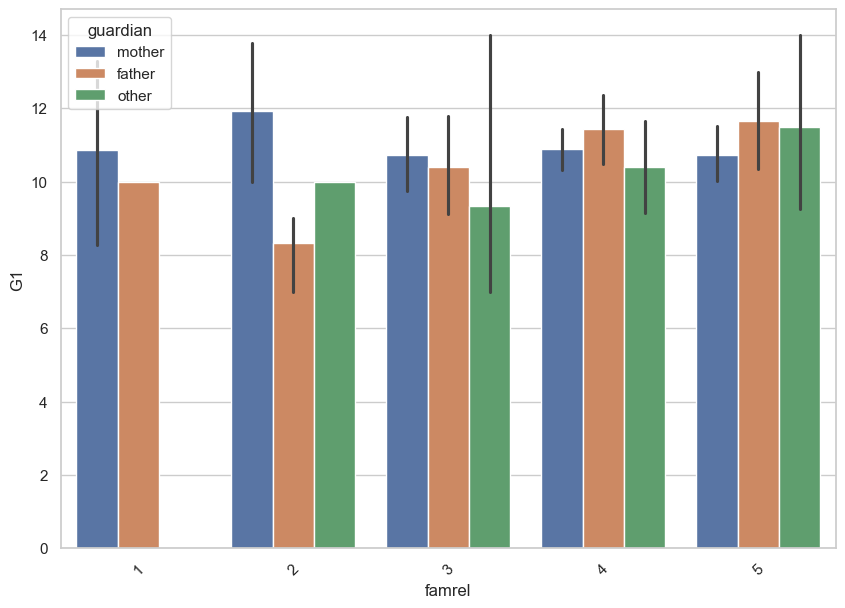

In [99]:
plt.figure(figsize=(10,7))
sns.barplot(x = "famrel", y = "G1", hue = "guardian", data = df)
plt.xticks(rotation=45)
plt.show()

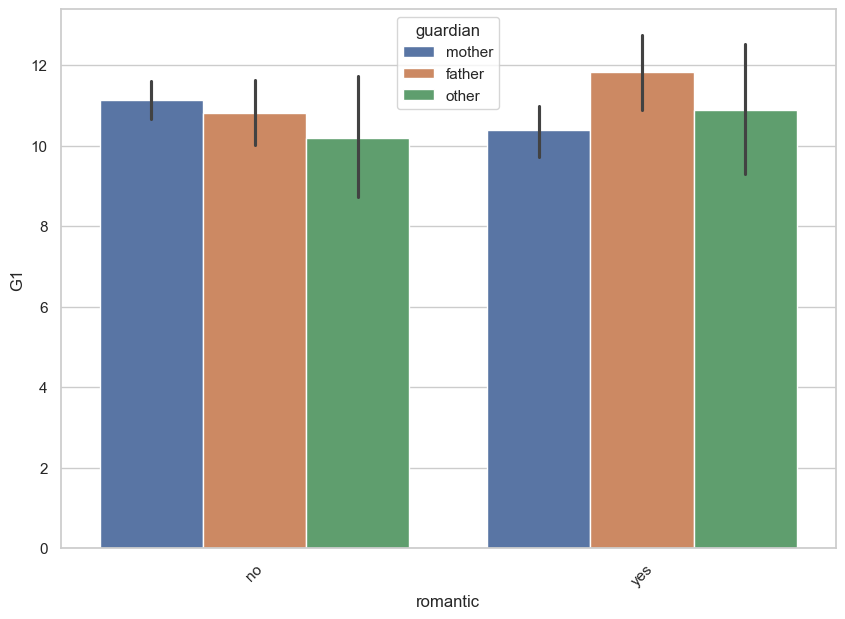

In [100]:
plt.figure(figsize=(10,7))
sns.barplot(x = "romantic", y = "G1", hue = "guardian", data = df)
plt.xticks(rotation=45)
plt.show()

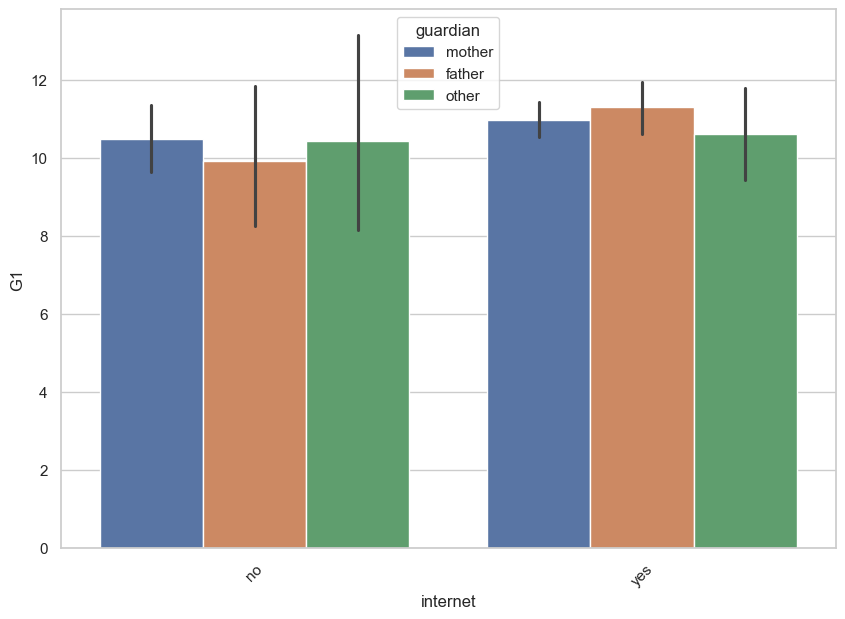

In [101]:
plt.figure(figsize=(10,7))
sns.barplot(x = "internet", y = "G1", hue = "guardian", data = df)
plt.xticks(rotation=45)
plt.show()

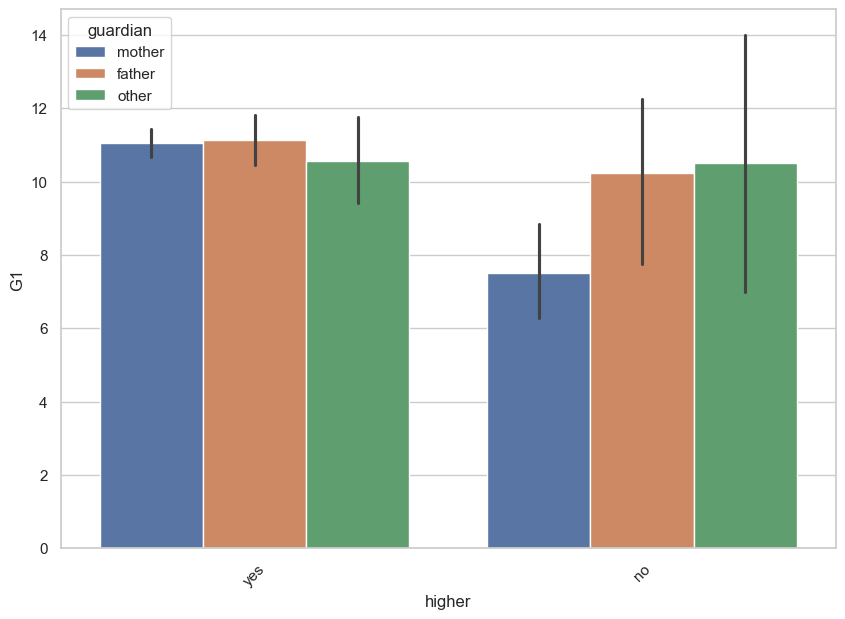

In [102]:
plt.figure(figsize=(10,7))
sns.barplot(x = "higher", y = "G1", hue = "guardian", data = df)
plt.xticks(rotation=45)
plt.show()

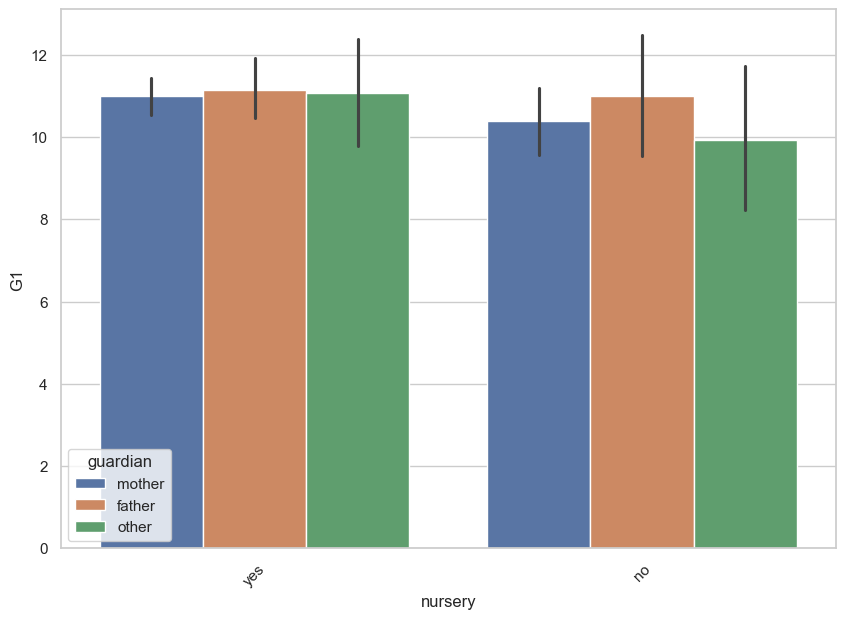

In [103]:
plt.figure(figsize=(10,7))
sns.barplot(x = "nursery", y = "G1", hue = "guardian", data = df)
plt.xticks(rotation=45)
plt.show()

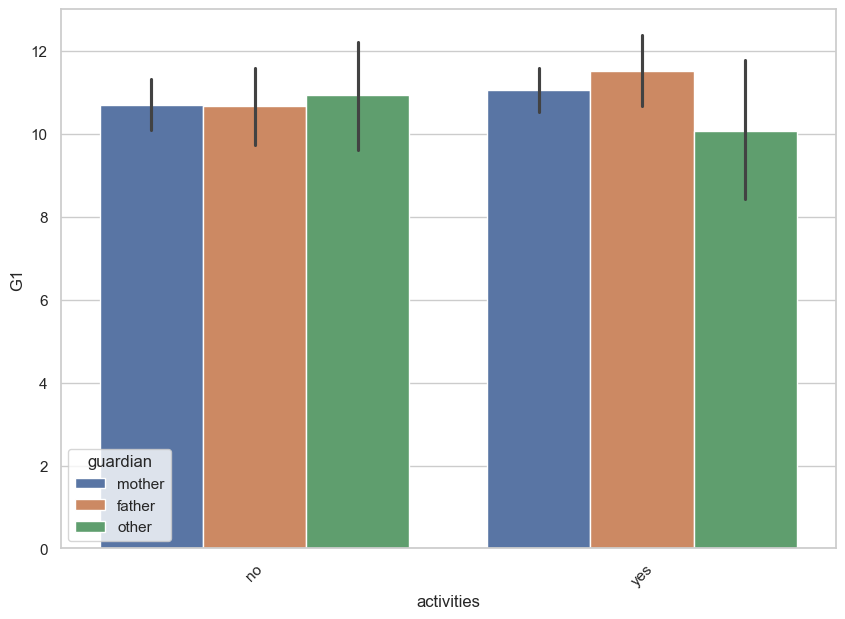

In [104]:
plt.figure(figsize=(10,7))
sns.barplot(x = "activities", y = "G1", hue = "guardian", data = df)
plt.xticks(rotation=45)
plt.show()

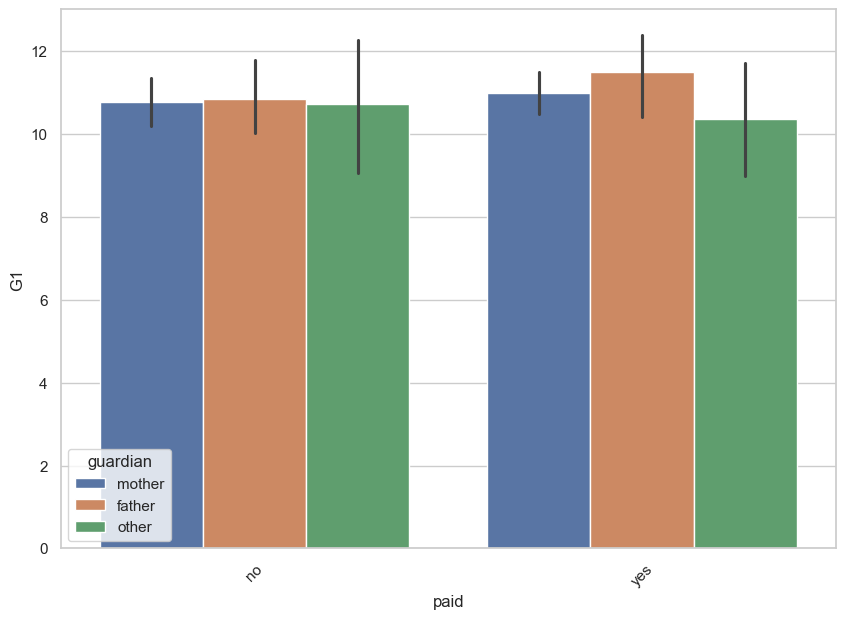

In [105]:
plt.figure(figsize=(10,7))
sns.barplot(x = "paid", y = "G1", hue = "guardian", data = df)
plt.xticks(rotation=45)
plt.show()

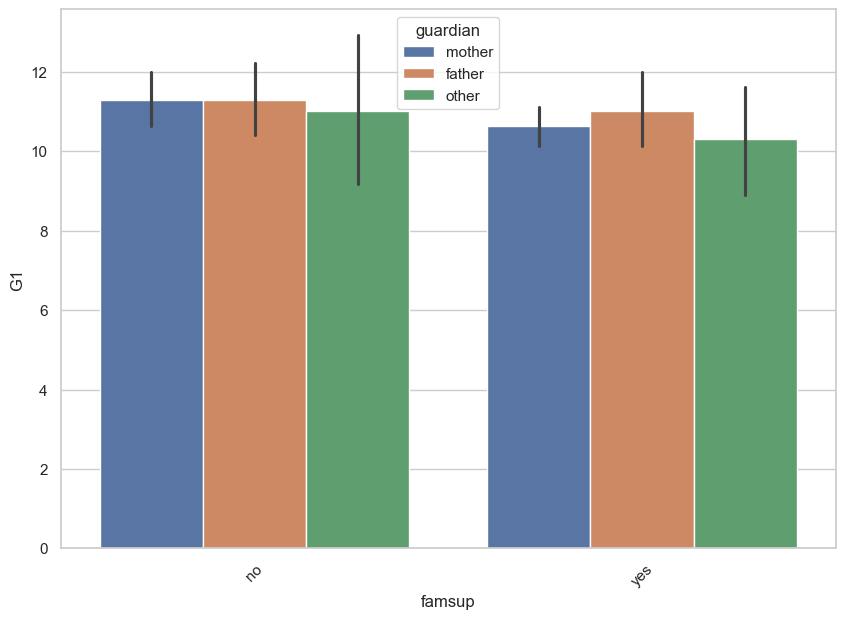

In [106]:
plt.figure(figsize=(10,7))
sns.barplot(x = "famsup", y = "G1", hue = "guardian", data = df)
plt.xticks(rotation=45)
plt.show()

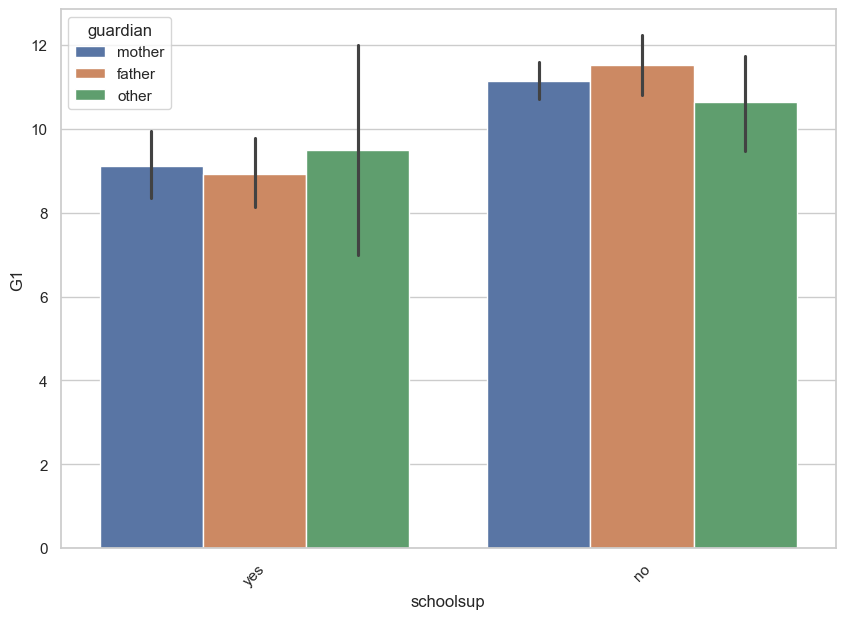

In [107]:
plt.figure(figsize=(10,7))
sns.barplot(x = "schoolsup", y = "G1", hue = "guardian", data = df)
plt.xticks(rotation=45)
plt.show()

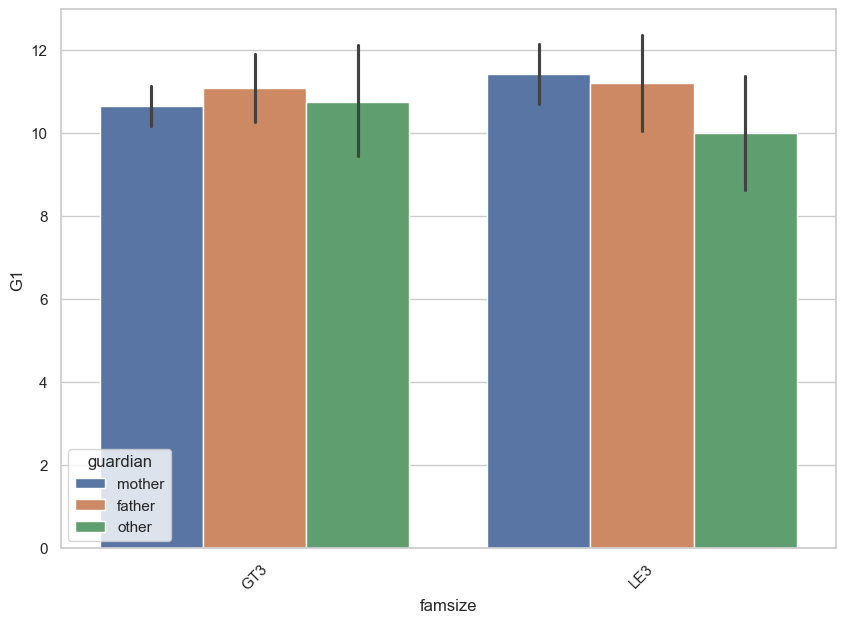

In [108]:
plt.figure(figsize=(10,7))
sns.barplot(x = "famsize", y = "G1", hue = "guardian", data = df)
plt.xticks(rotation=45)
plt.show()

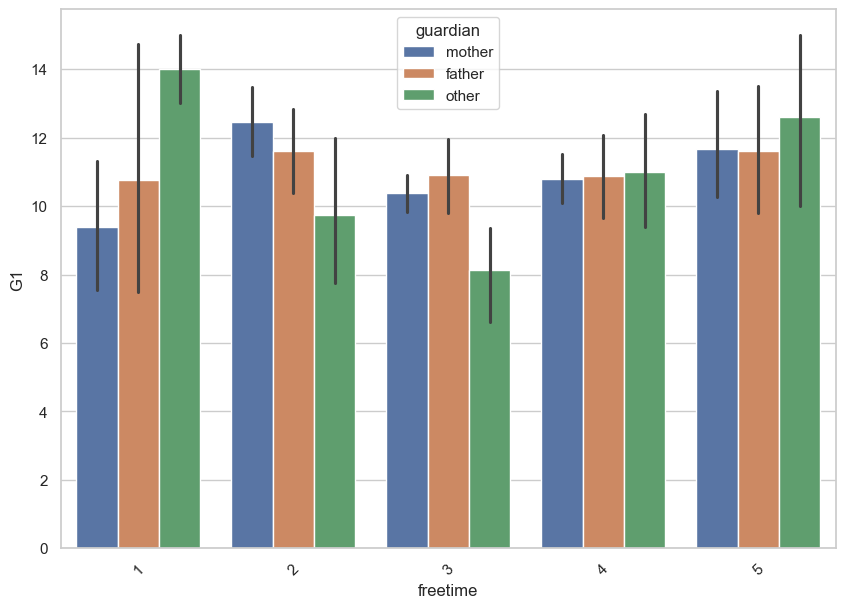

In [109]:
plt.figure(figsize=(10,7))
sns.barplot(x = "freetime", y = "G1", hue = "guardian", data = df)
plt.xticks(rotation=45)
plt.show()

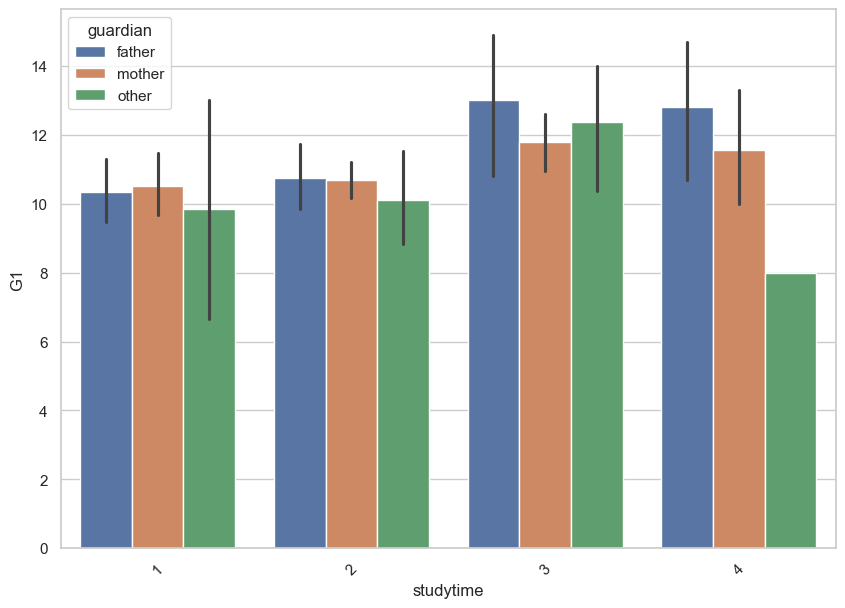

In [110]:
plt.figure(figsize=(10,7))
sns.barplot(x = "studytime", y = "G1", hue = "guardian", data = df)
plt.xticks(rotation=45)
plt.show()

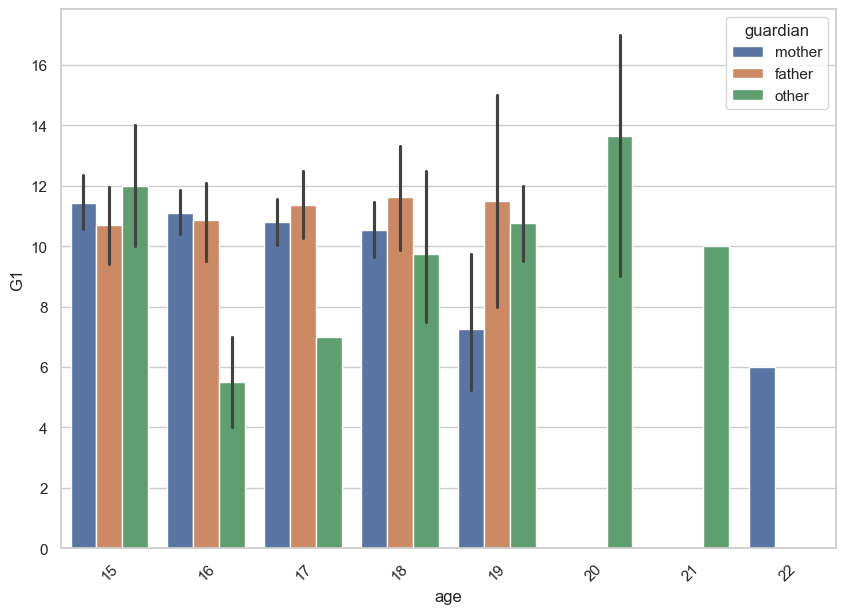

In [111]:
plt.figure(figsize=(10,7))
sns.barplot(x = "age", y = "G1", hue = "guardian", data = df)
plt.xticks(rotation=45)
plt.show()

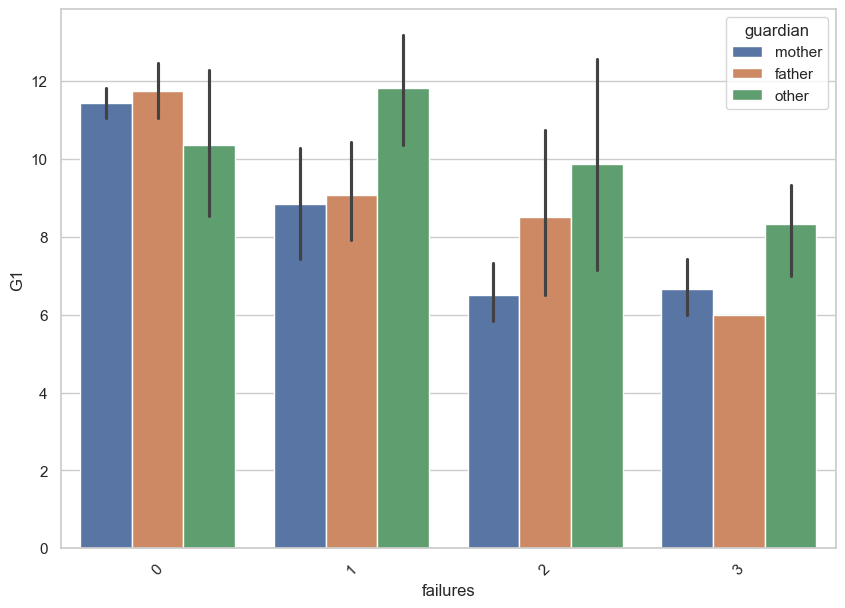

In [112]:
plt.figure(figsize=(10,7))
sns.barplot(x = "failures", y = "G1", hue = "guardian", data = df)
plt.xticks(rotation=45)
plt.show()

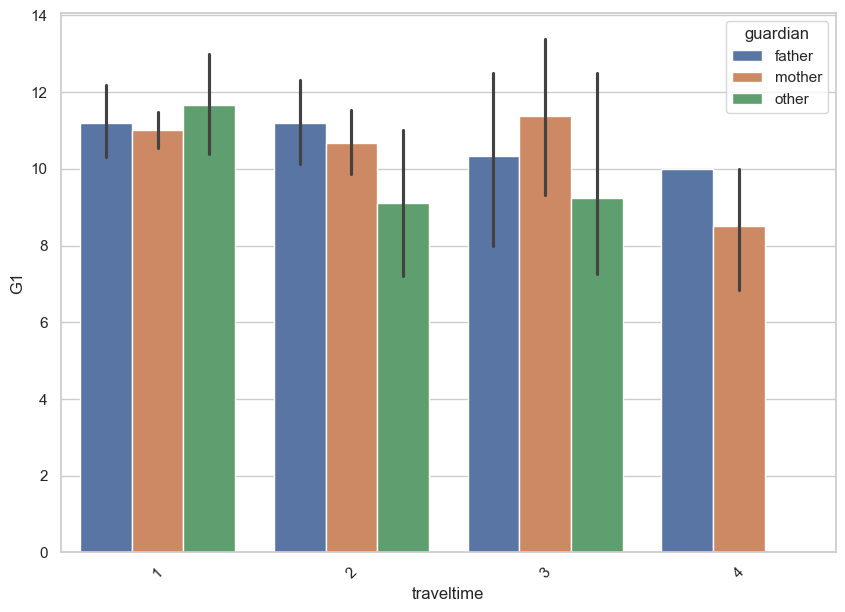

In [113]:
plt.figure(figsize=(10,7))
sns.barplot(x = "traveltime", y = "G1", hue = "guardian", data = df)
plt.xticks(rotation=45)
plt.show()

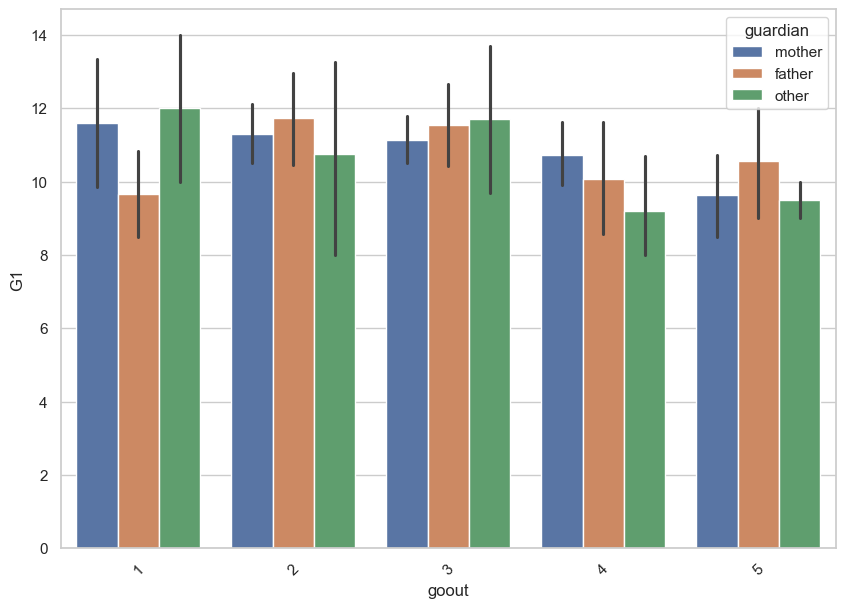

In [114]:
plt.figure(figsize=(10,7))
sns.barplot(x = "goout", y = "G1", hue = "guardian", data = df)
plt.xticks(rotation=45)
plt.show()

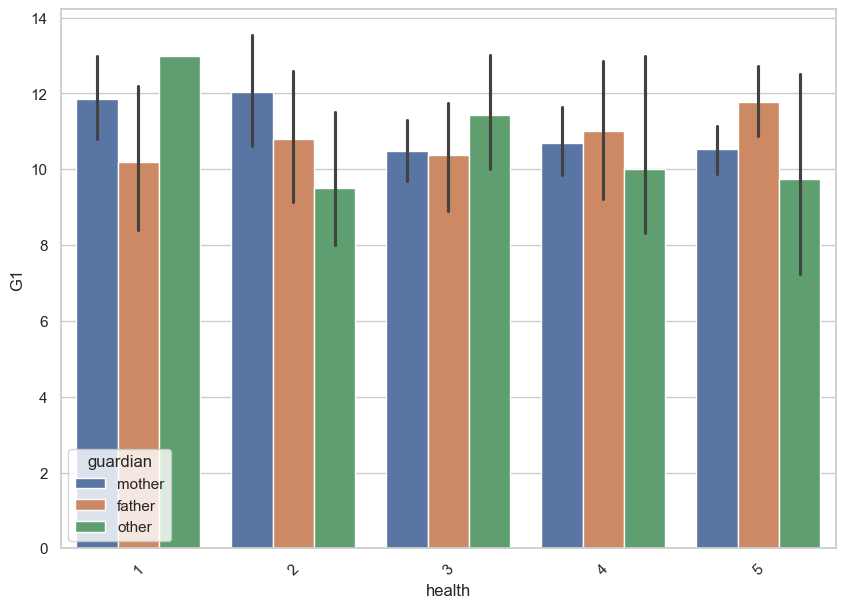

In [115]:
plt.figure(figsize=(10,7))
sns.barplot(x = "health", y = "G1", hue = "guardian", data = df)
plt.xticks(rotation=45)
plt.show()

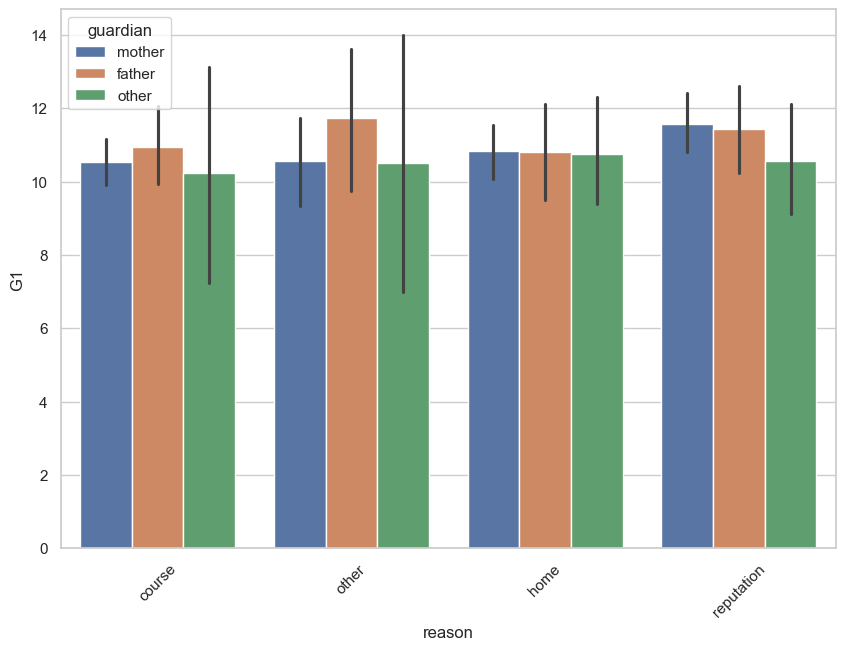

In [116]:
plt.figure(figsize=(10,7))
sns.barplot(x = "reason", y = "G1", hue = "guardian", data = df)
plt.xticks(rotation=45)
plt.show()

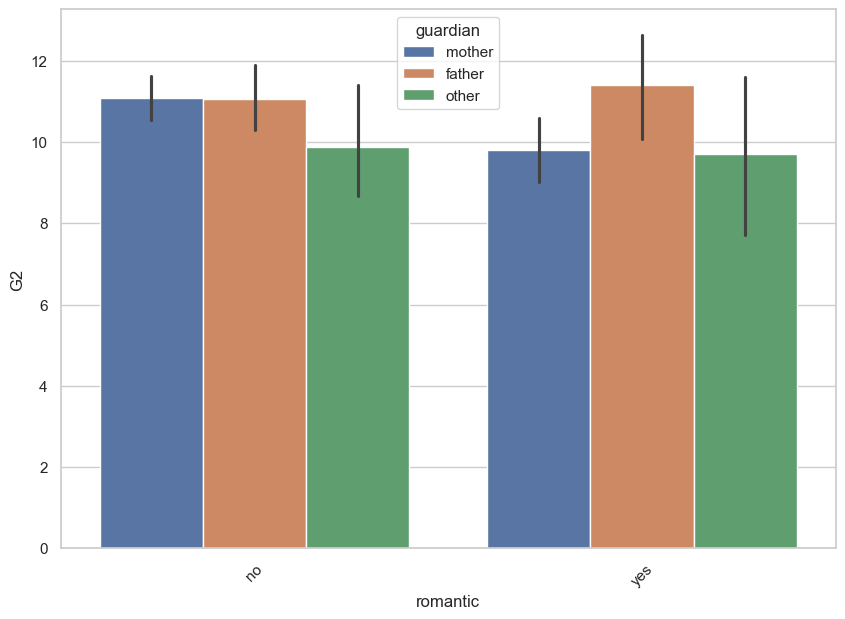

In [117]:
plt.figure(figsize=(10,7))
sns.barplot(x = "romantic", y = "G2", hue = "guardian", data = df)
plt.xticks(rotation=45)
plt.show()

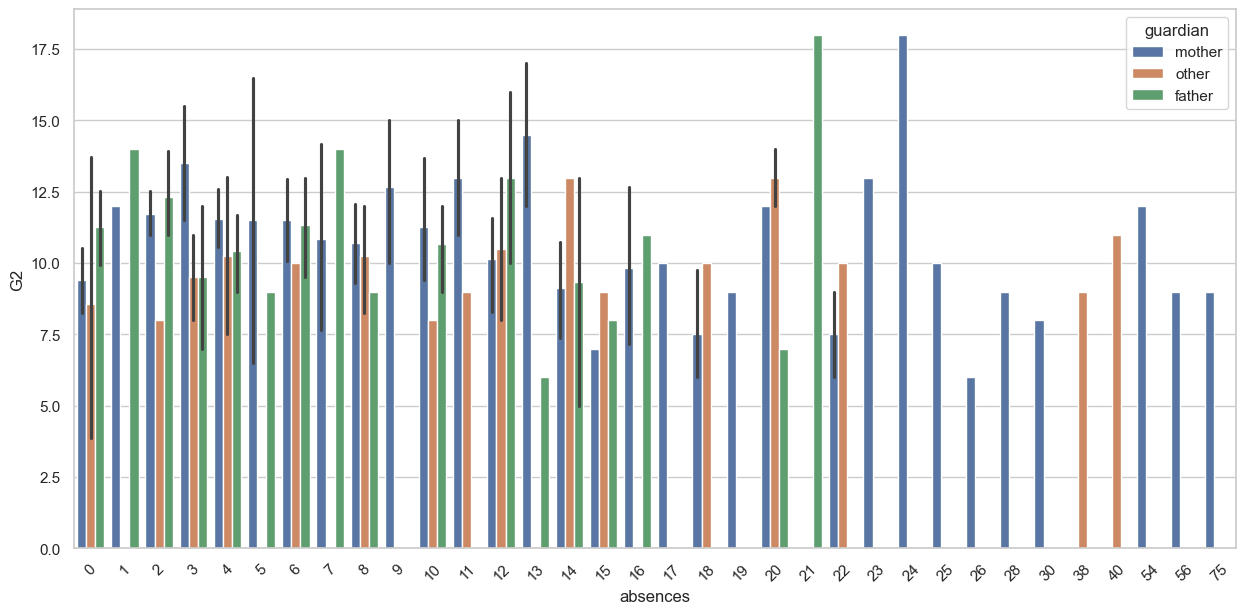

In [118]:
plt.figure(figsize=(15,7))
sns.barplot(x = "absences", y = "G2", hue = "guardian", data = df)
plt.xticks(rotation=45)
plt.show()

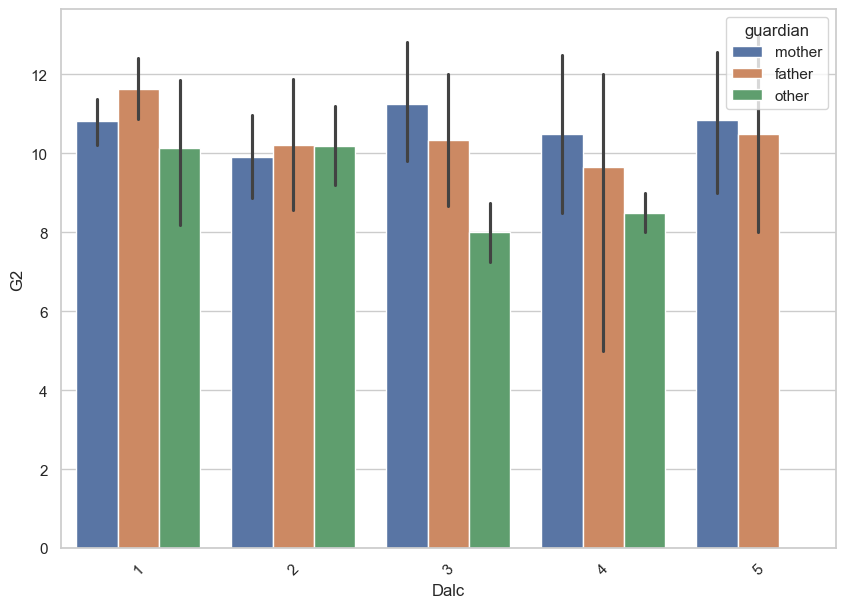

In [119]:
plt.figure(figsize=(10,7))
sns.barplot(x = "Dalc", y = "G2", hue = "guardian", data = df)
plt.xticks(rotation=45)
plt.show()

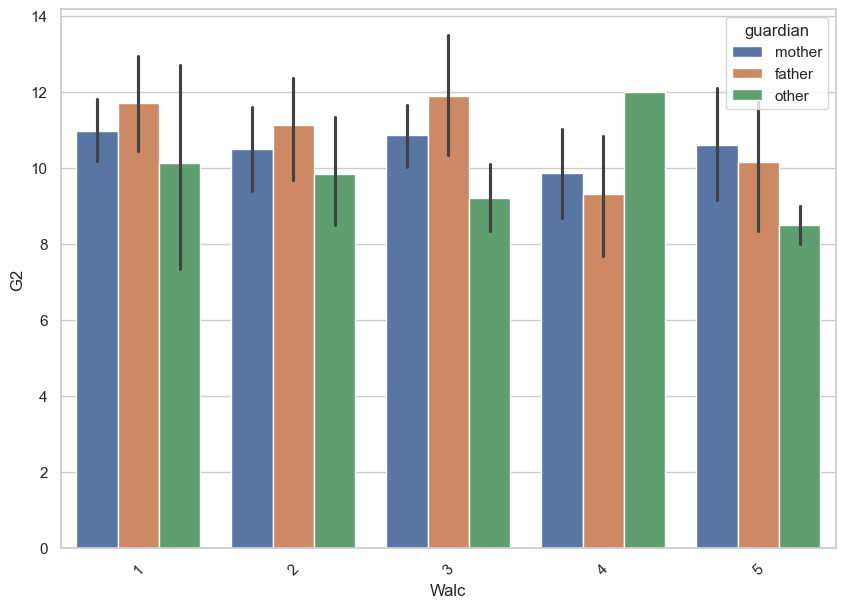

In [120]:
plt.figure(figsize=(10,7))
sns.barplot(x = "Walc", y = "G2", hue = "guardian", data = df)
plt.xticks(rotation=45)
plt.show()

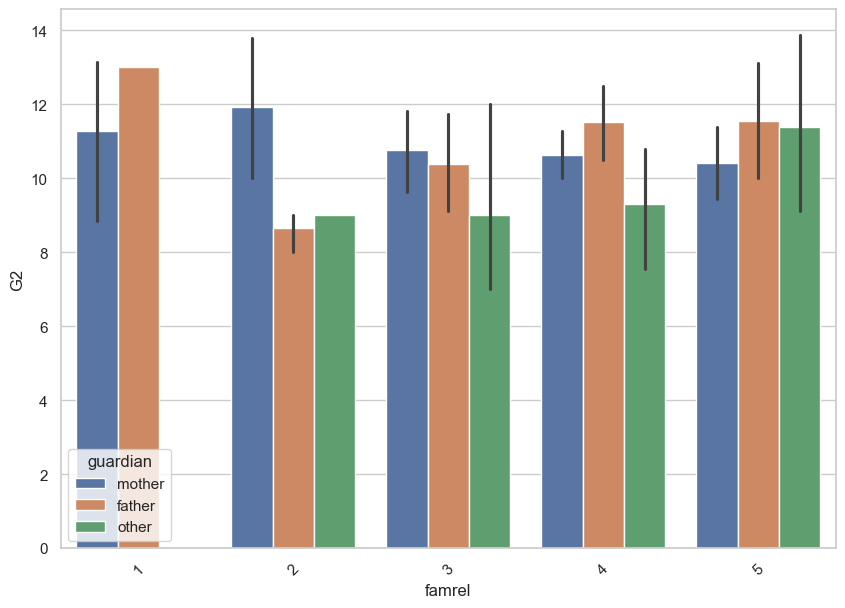

In [121]:
plt.figure(figsize=(10,7))
sns.barplot(x = "famrel", y = "G2", hue = "guardian", data = df)
plt.xticks(rotation=45)
plt.show()

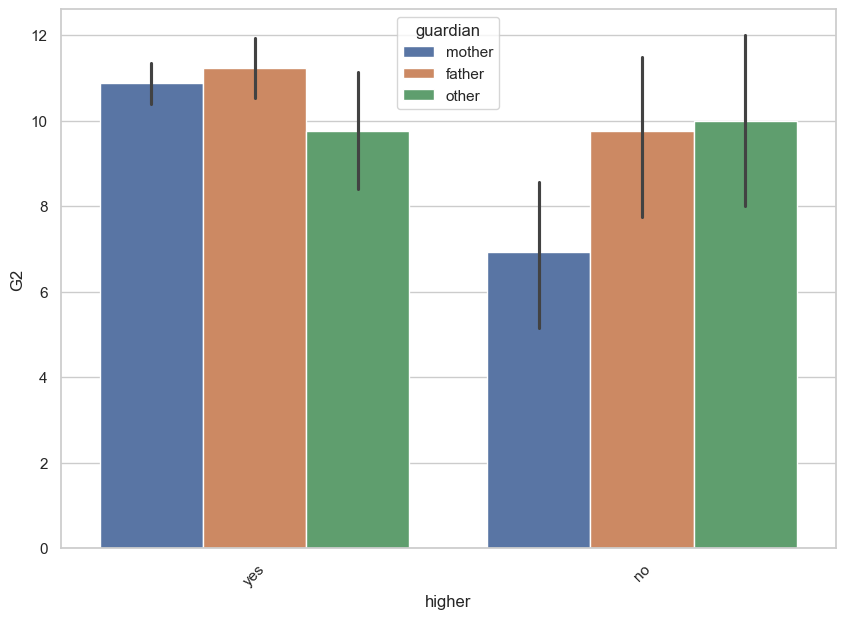

In [122]:
plt.figure(figsize=(10,7))
sns.barplot(x = "higher", y = "G2", hue = "guardian", data = df)
plt.xticks(rotation=45)
plt.show()

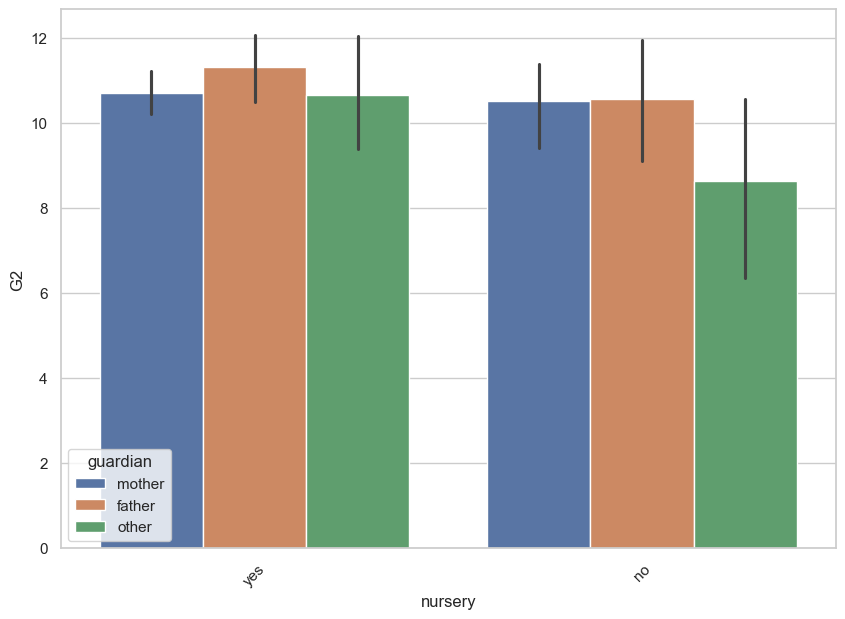

In [123]:
plt.figure(figsize=(10,7))
sns.barplot(x = "nursery", y = "G2", hue = "guardian", data = df)
plt.xticks(rotation=45)
plt.show()

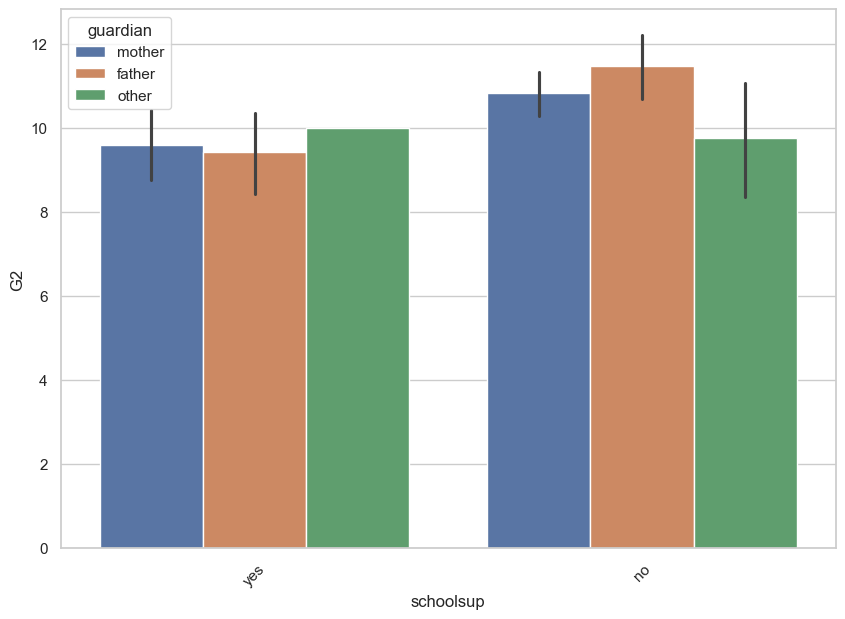

In [124]:
plt.figure(figsize=(10,7))
sns.barplot(x = "schoolsup", y = "G2", hue = "guardian", data = df)
plt.xticks(rotation=45)
plt.show()

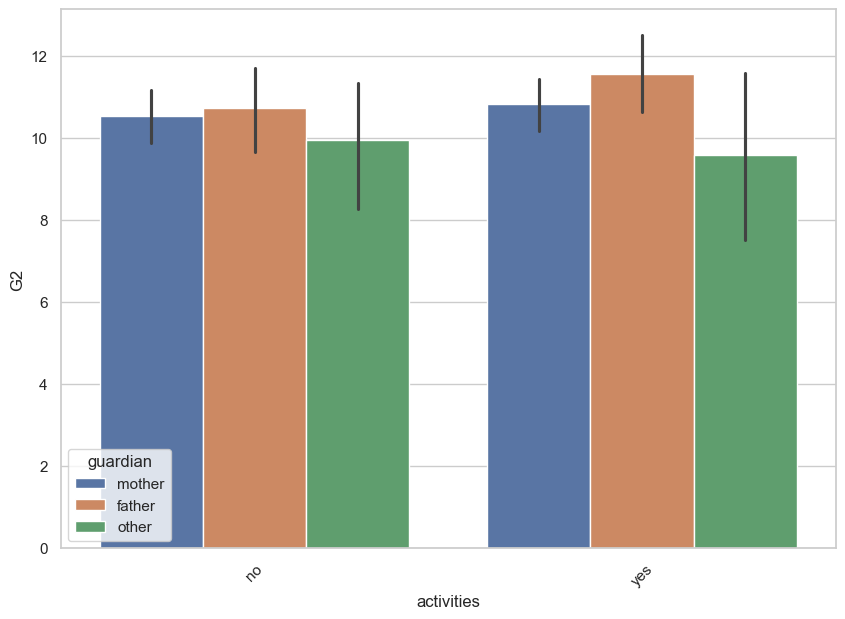

In [125]:
plt.figure(figsize=(10,7))
sns.barplot(x = "activities", y = "G2", hue = "guardian", data = df)
plt.xticks(rotation=45)
plt.show()

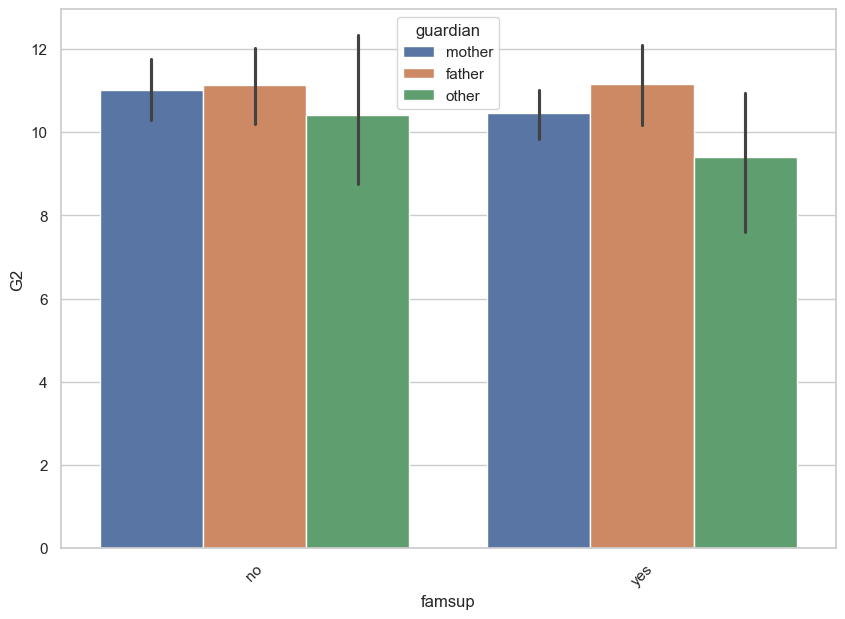

In [126]:
plt.figure(figsize=(10,7))
sns.barplot(x = "famsup", y = "G2", hue = "guardian", data = df)
plt.xticks(rotation=45)
plt.show()

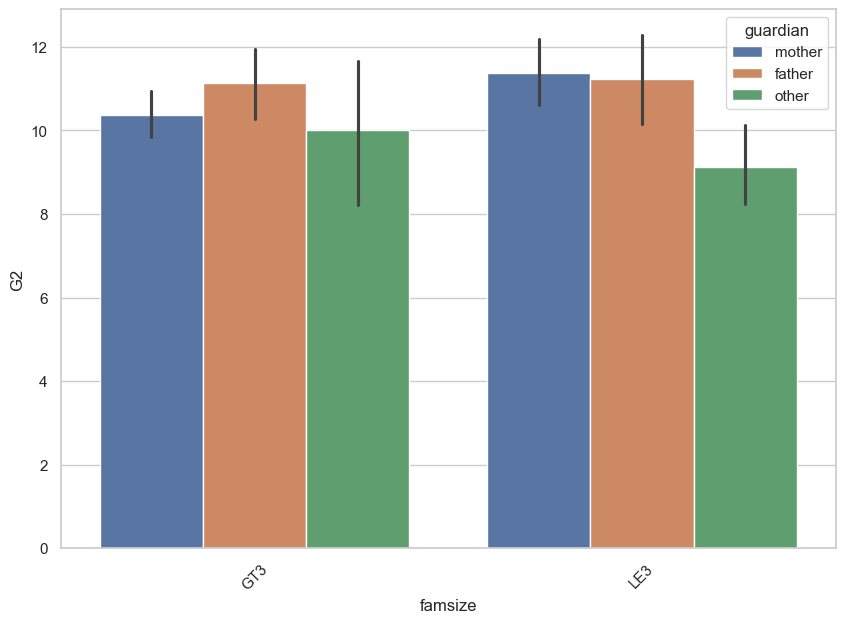

In [127]:
plt.figure(figsize=(10,7))
sns.barplot(x = "famsize", y = "G2", hue = "guardian", data = df)
plt.xticks(rotation=45)
plt.show()

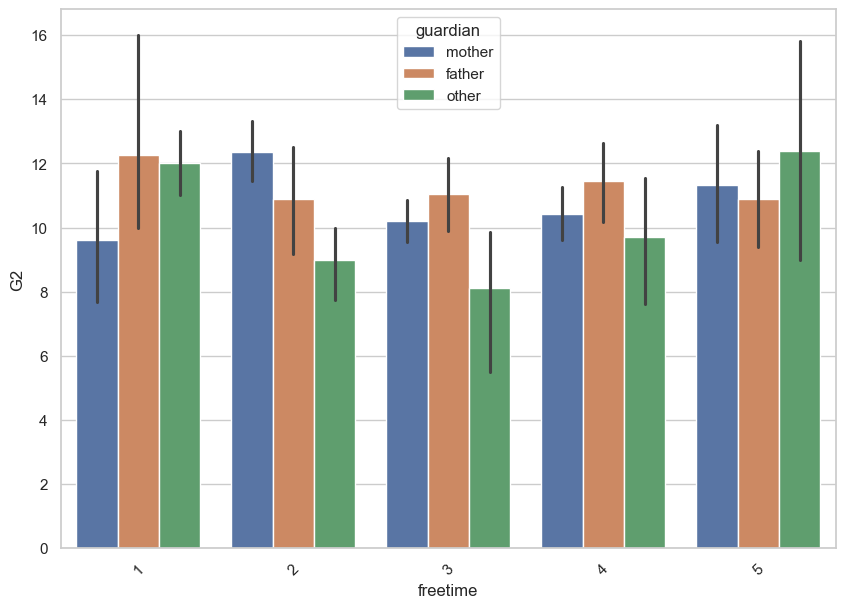

In [128]:
plt.figure(figsize=(10,7))
sns.barplot(x = "freetime", y = "G2", hue = "guardian", data = df)
plt.xticks(rotation=45)
plt.show()

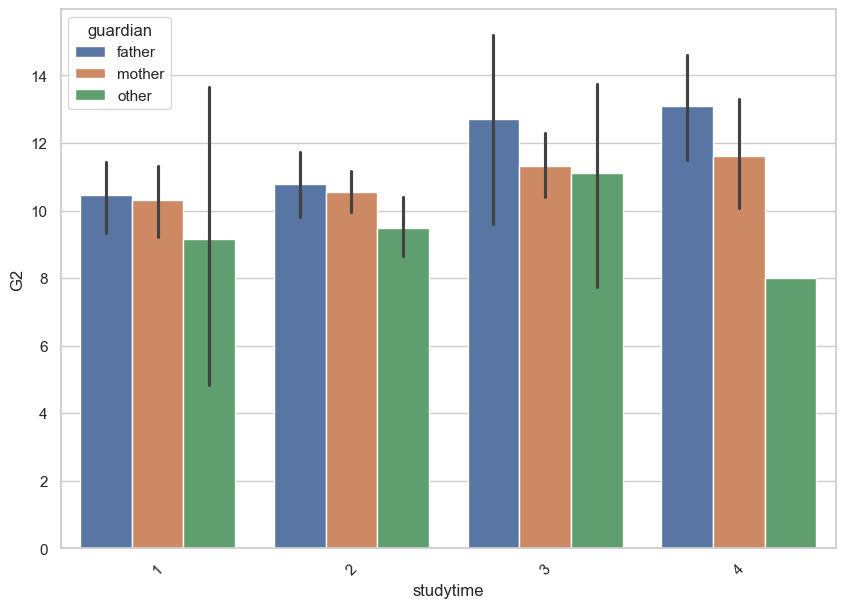

In [129]:
plt.figure(figsize=(10,7))
sns.barplot(x = "studytime", y = "G2", hue = "guardian", data = df)
plt.xticks(rotation=45)
plt.show()

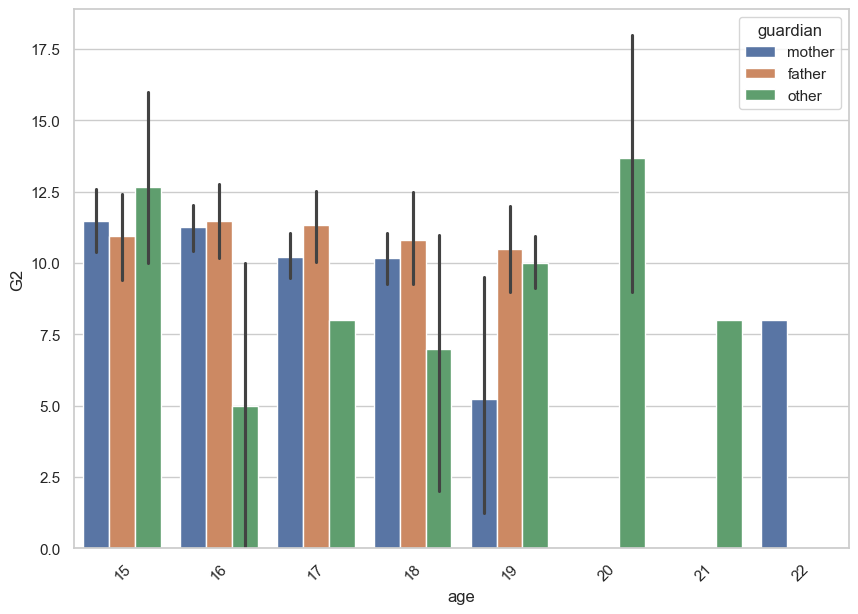

In [130]:
plt.figure(figsize=(10,7))
sns.barplot(x = "age", y = "G2", hue = "guardian", data = df)
plt.xticks(rotation=45)
plt.show()

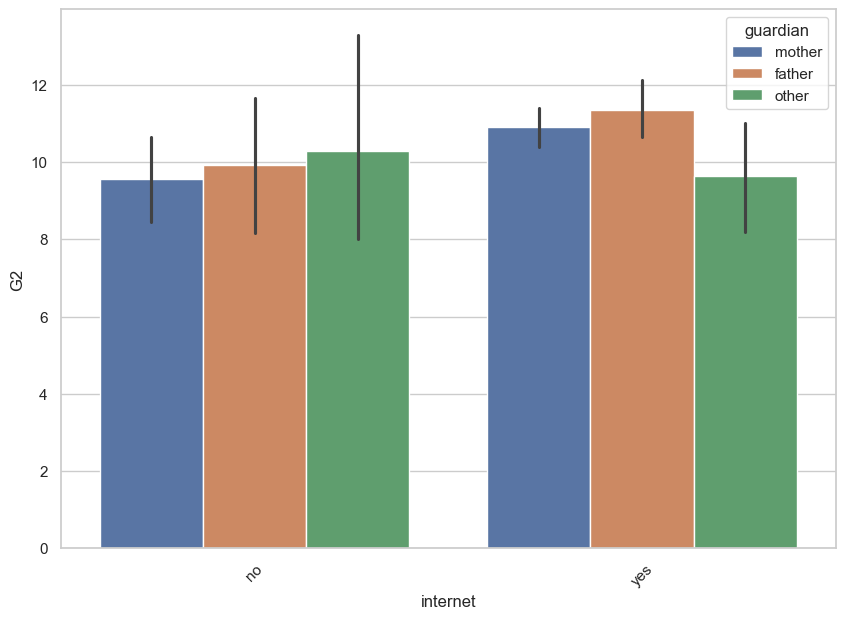

In [131]:
plt.figure(figsize=(10,7))
sns.barplot(x = "internet", y = "G2", hue = "guardian", data = df)
plt.xticks(rotation=45)
plt.show()

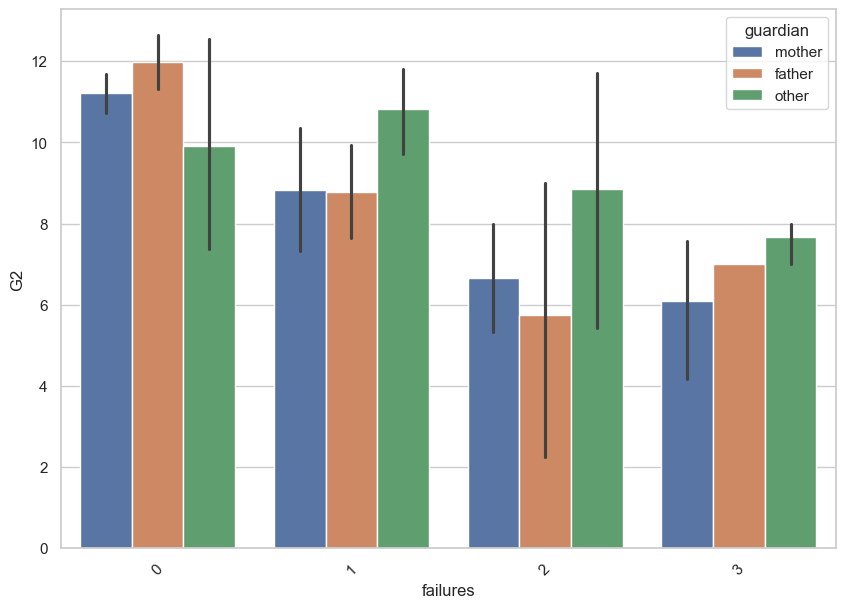

In [132]:
plt.figure(figsize=(10,7))
sns.barplot(x = "failures", y = "G2", hue = "guardian", data = df)
plt.xticks(rotation=45)
plt.show()

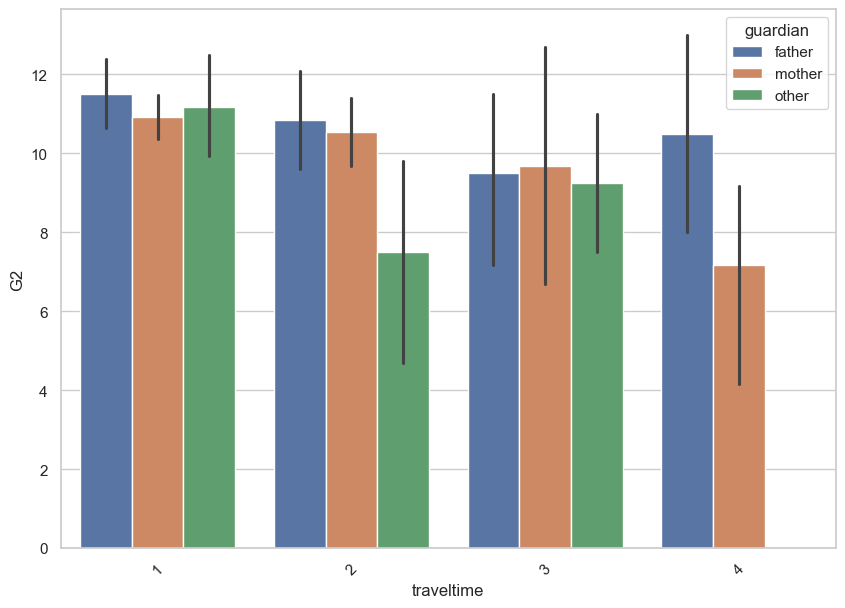

In [133]:
plt.figure(figsize=(10,7))
sns.barplot(x = "traveltime", y = "G2", hue = "guardian", data = df)
plt.xticks(rotation=45)
plt.show()

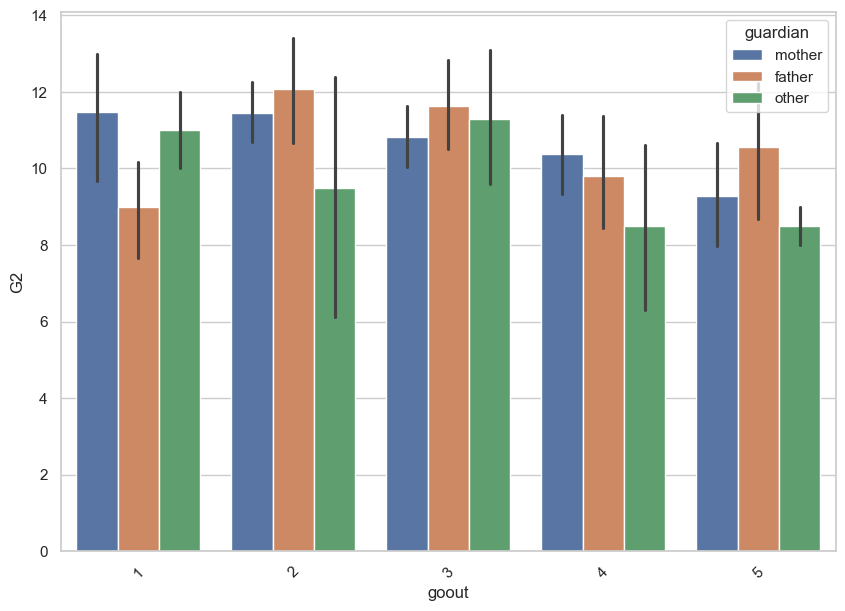

In [134]:
plt.figure(figsize=(10,7))
sns.barplot(x = "goout", y = "G2", hue = "guardian", data = df)
plt.xticks(rotation=45)
plt.show()

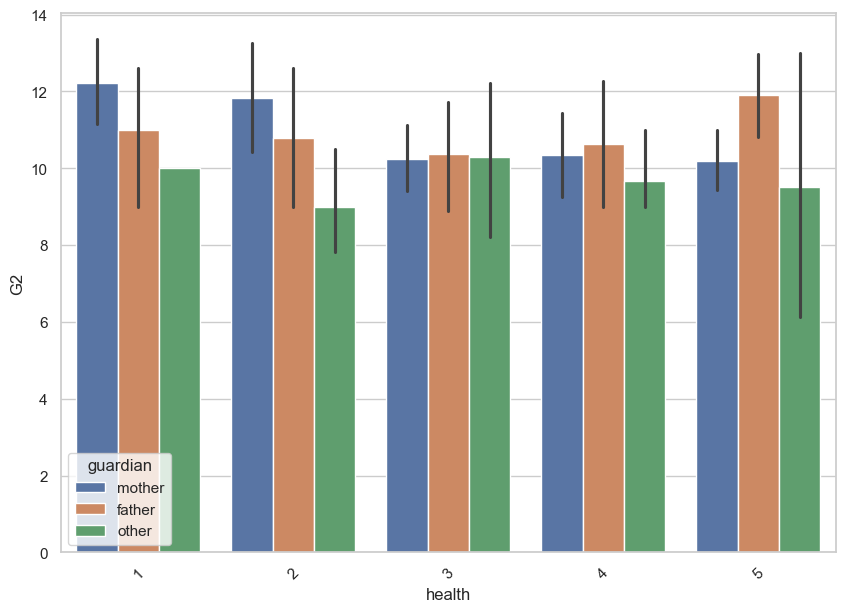

In [135]:
plt.figure(figsize=(10,7))
sns.barplot(x = "health", y = "G2", hue = "guardian", data = df)
plt.xticks(rotation=45)
plt.show()

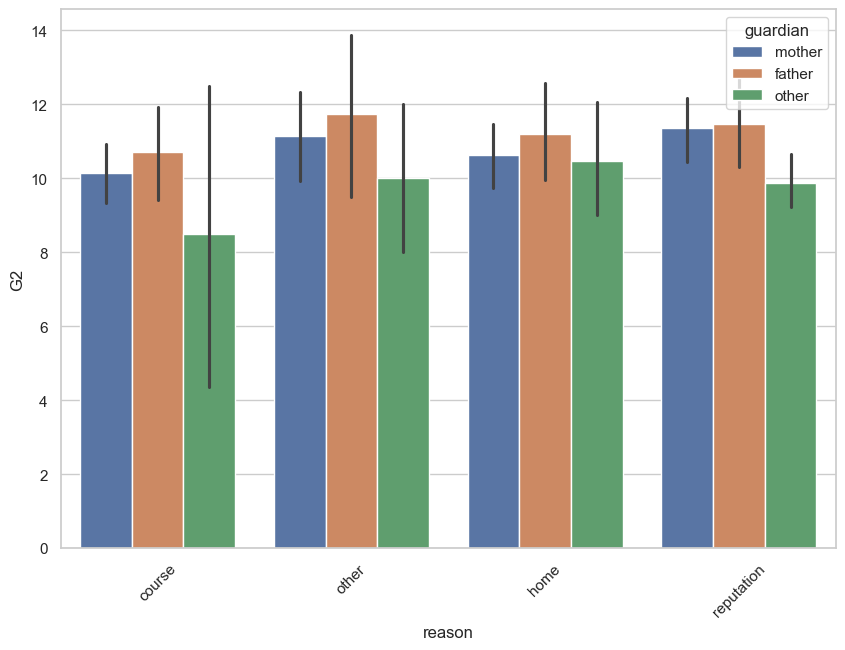

In [136]:
plt.figure(figsize=(10,7))
sns.barplot(x = "reason", y = "G2", hue = "guardian", data = df)
plt.xticks(rotation=45)
plt.show()

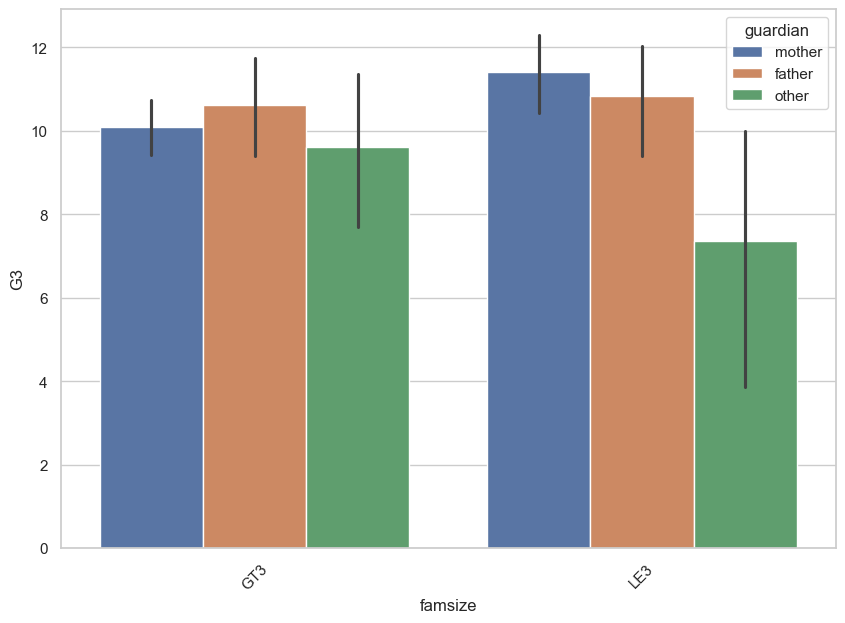

In [137]:
plt.figure(figsize=(10,7))
sns.barplot(x = "famsize", y = "G3", hue = "guardian", data = df)
plt.xticks(rotation=45)
plt.show()

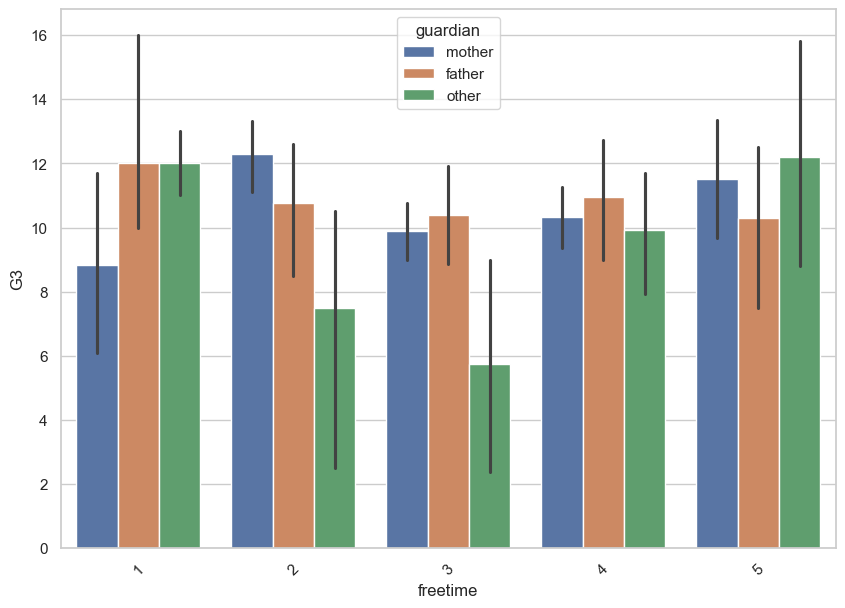

In [138]:
plt.figure(figsize=(10,7))
sns.barplot(x = "freetime", y = "G3", hue = "guardian", data = df)
plt.xticks(rotation=45)
plt.show()

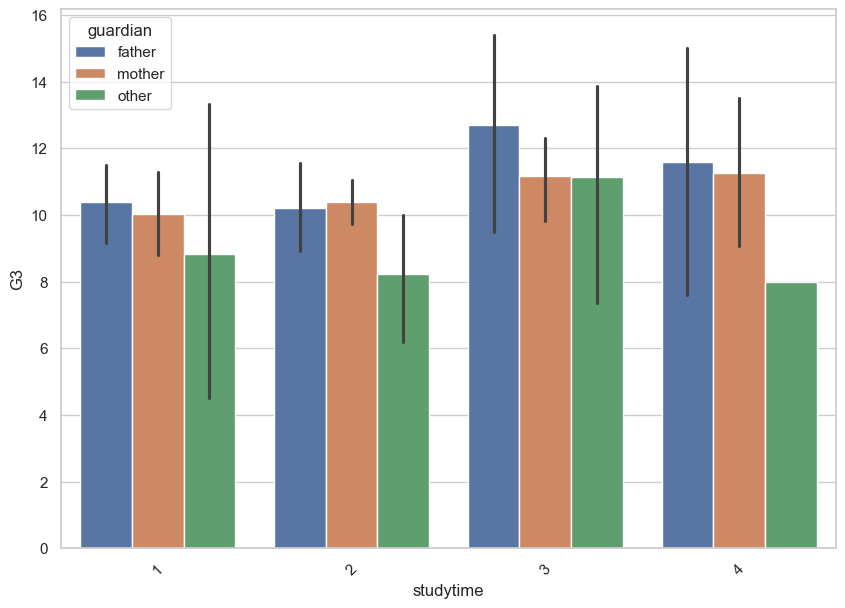

In [139]:
plt.figure(figsize=(10,7))
sns.barplot(x = "studytime", y = "G3", hue = "guardian", data = df)
plt.xticks(rotation=45)
plt.show()

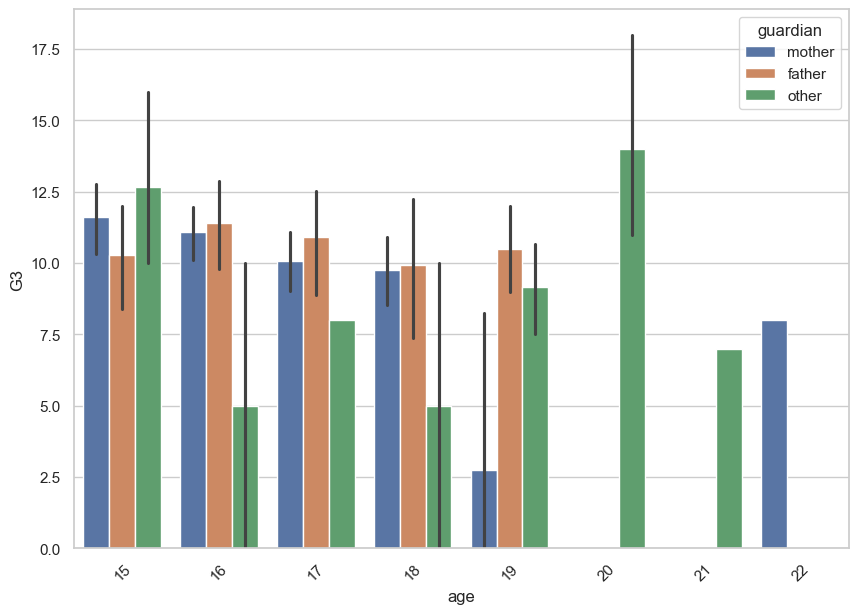

In [140]:
plt.figure(figsize=(10,7))
sns.barplot(x = "age", y = "G3", hue = "guardian", data = df)
plt.xticks(rotation=45)
plt.show()

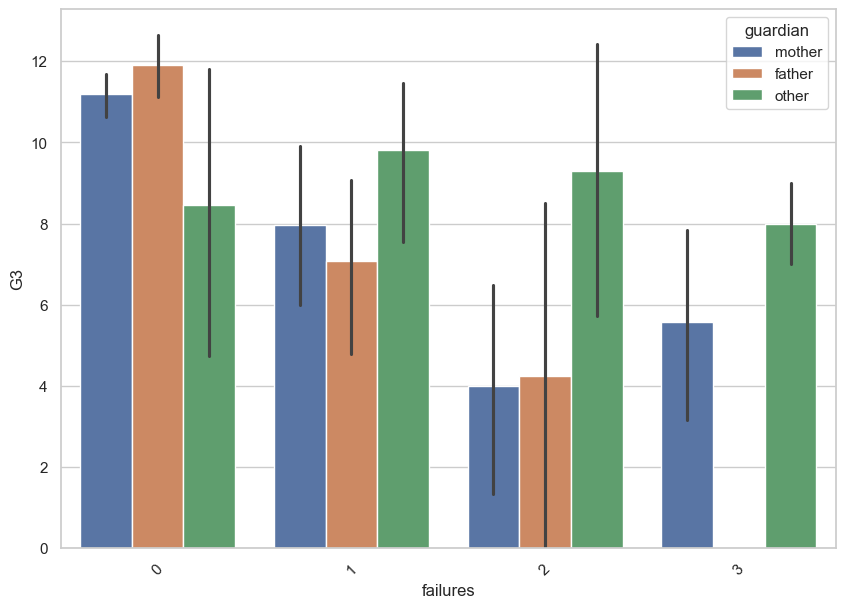

In [141]:
plt.figure(figsize=(10,7))
sns.barplot(x = "failures", y = "G3", hue = "guardian", data = df)
plt.xticks(rotation=45)
plt.show()

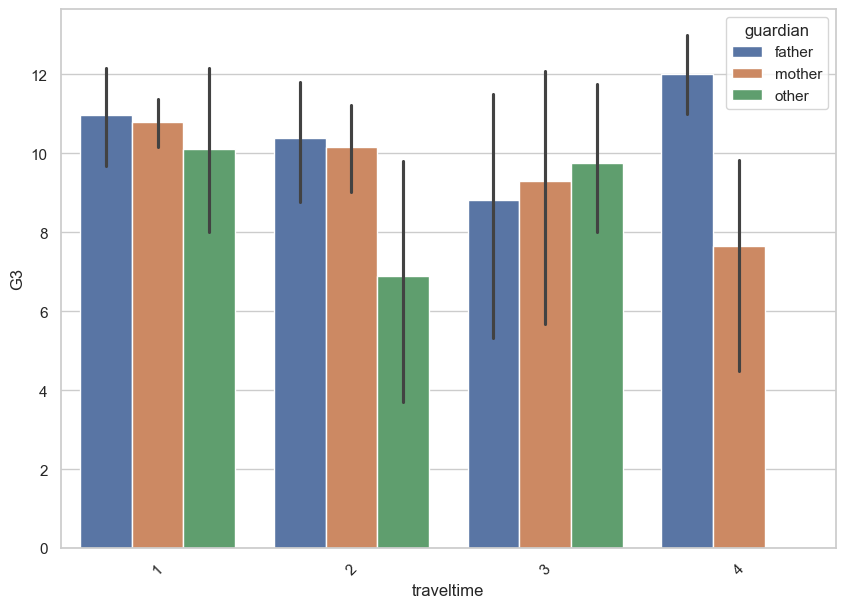

In [142]:
plt.figure(figsize=(10,7))
sns.barplot(x = "traveltime", y = "G3", hue = "guardian", data = df)
plt.xticks(rotation=45)
plt.show()

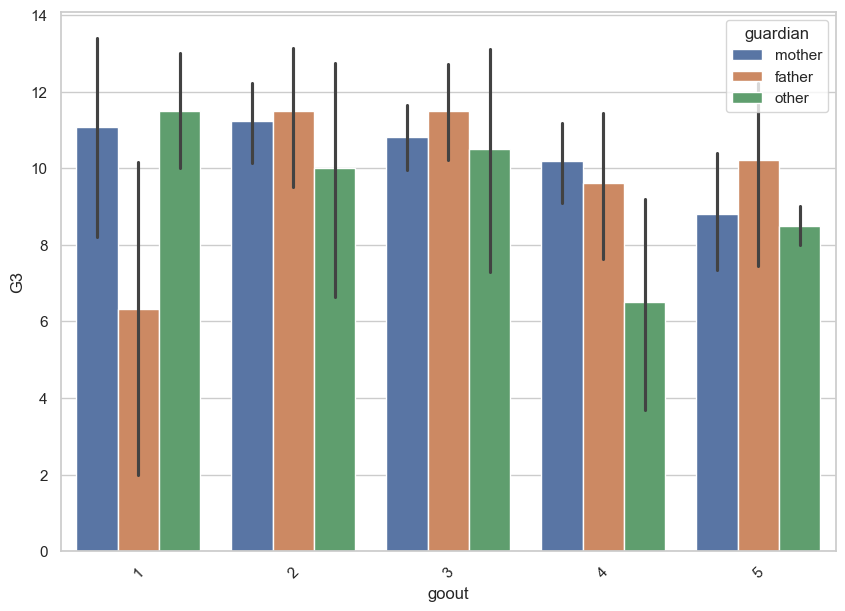

In [143]:
plt.figure(figsize=(10,7))
sns.barplot(x = "goout", y = "G3", hue = "guardian", data = df)
plt.xticks(rotation=45)
plt.show()

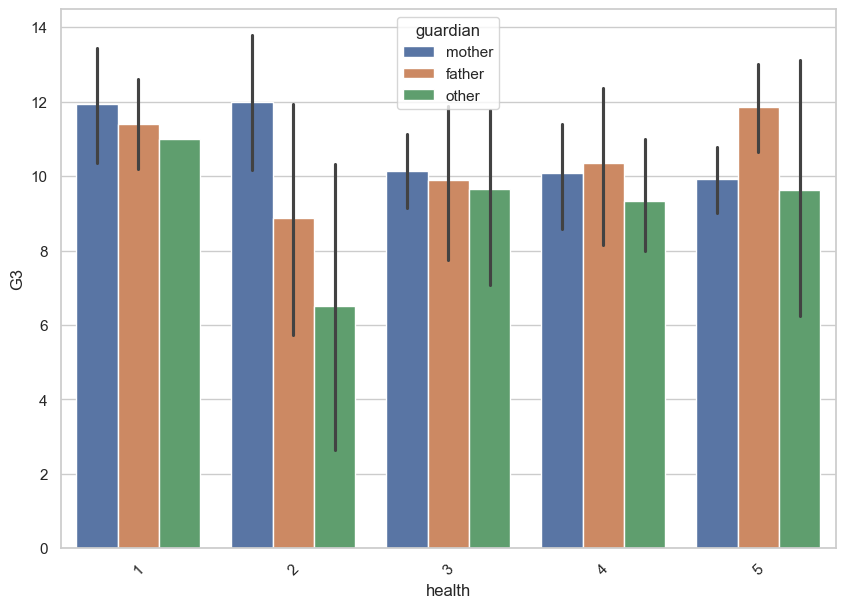

In [144]:
plt.figure(figsize=(10,7))
sns.barplot(x = "health", y = "G3", hue = "guardian", data = df)
plt.xticks(rotation=45)
plt.show()

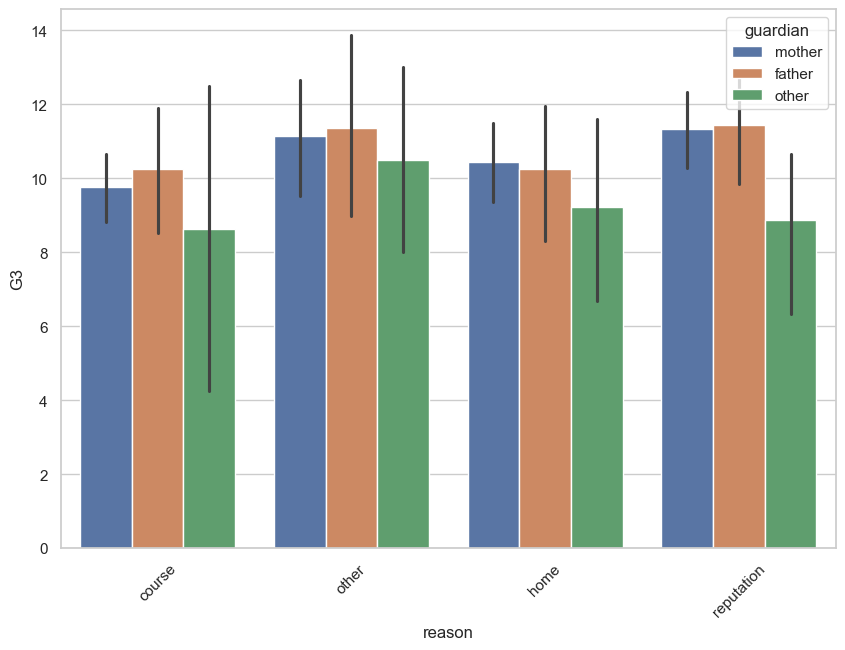

In [145]:
plt.figure(figsize=(10,7))
sns.barplot(x = "reason", y = "G3", hue = "guardian", data = df)
plt.xticks(rotation=45)
plt.show()

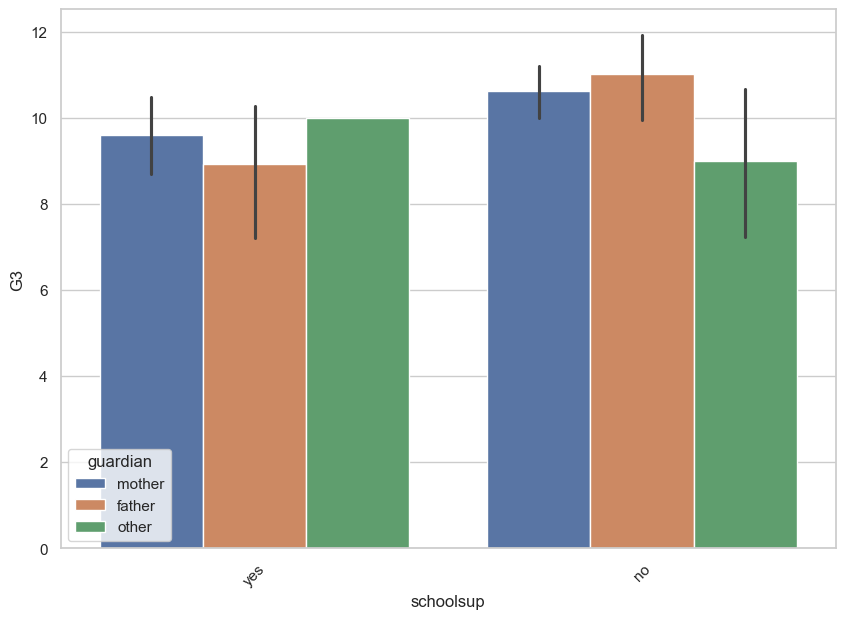

In [146]:
plt.figure(figsize=(10,7))
sns.barplot(x = "schoolsup", y = "G3", hue = "guardian", data = df)
plt.xticks(rotation=45)
plt.show()

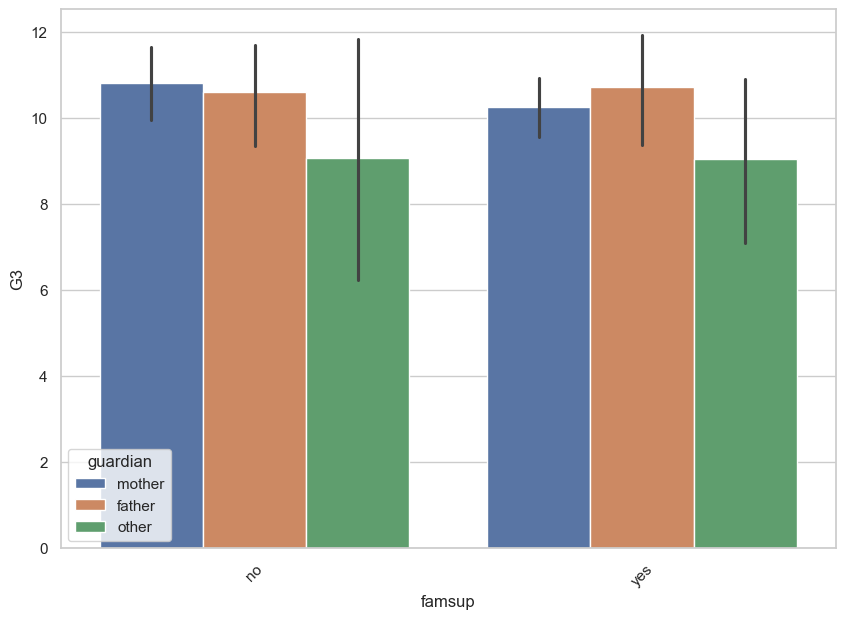

In [147]:
plt.figure(figsize=(10,7))
sns.barplot(x = "famsup", y = "G3", hue = "guardian", data = df)
plt.xticks(rotation=45)
plt.show()

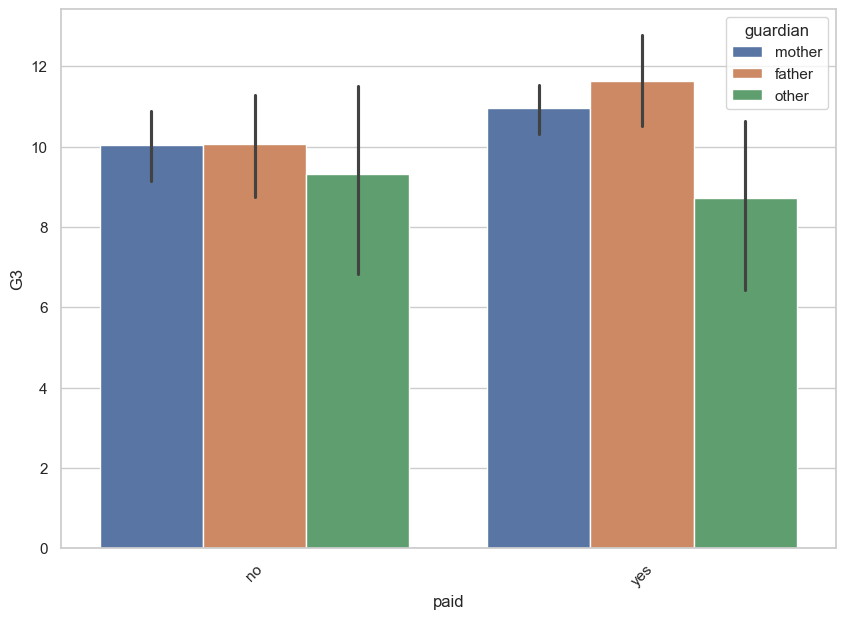

In [148]:
plt.figure(figsize=(10,7))
sns.barplot(x = "paid", y = "G3", hue = "guardian", data = df)
plt.xticks(rotation=45)
plt.show()

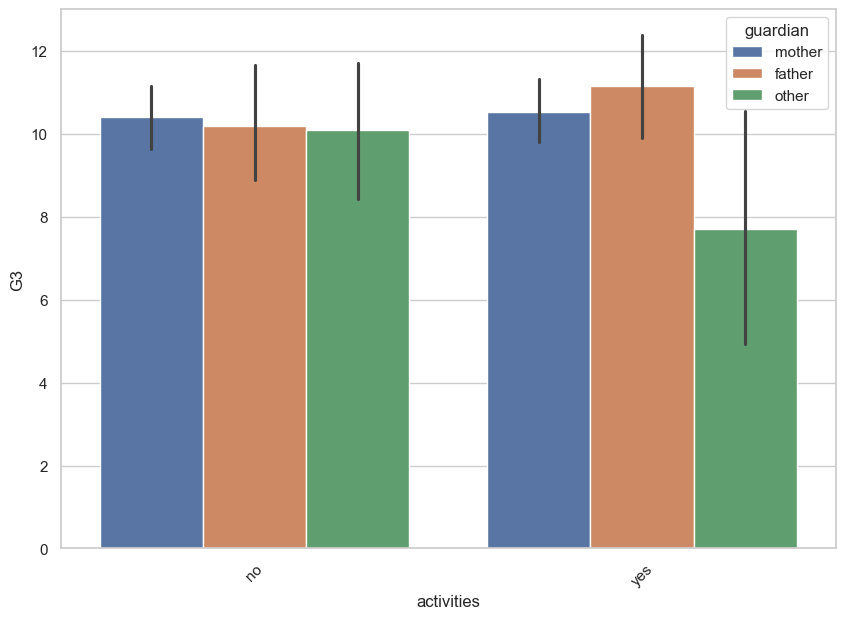

In [149]:
plt.figure(figsize=(10,7))
sns.barplot(x = "activities", y = "G3", hue = "guardian", data = df)
plt.xticks(rotation=45)
plt.show()

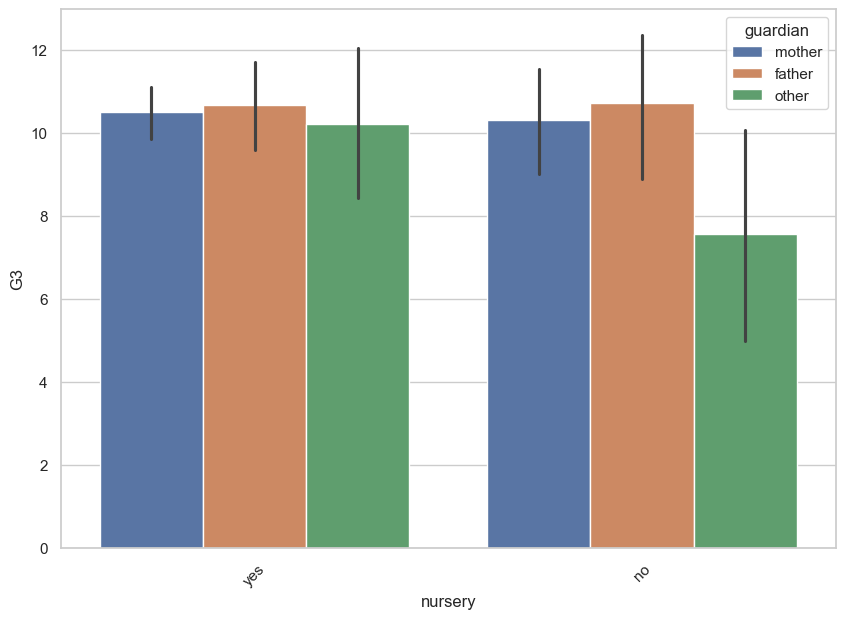

In [150]:
plt.figure(figsize=(10,7))
sns.barplot(x = "nursery", y = "G3", hue = "guardian", data = df)
plt.xticks(rotation=45)
plt.show()

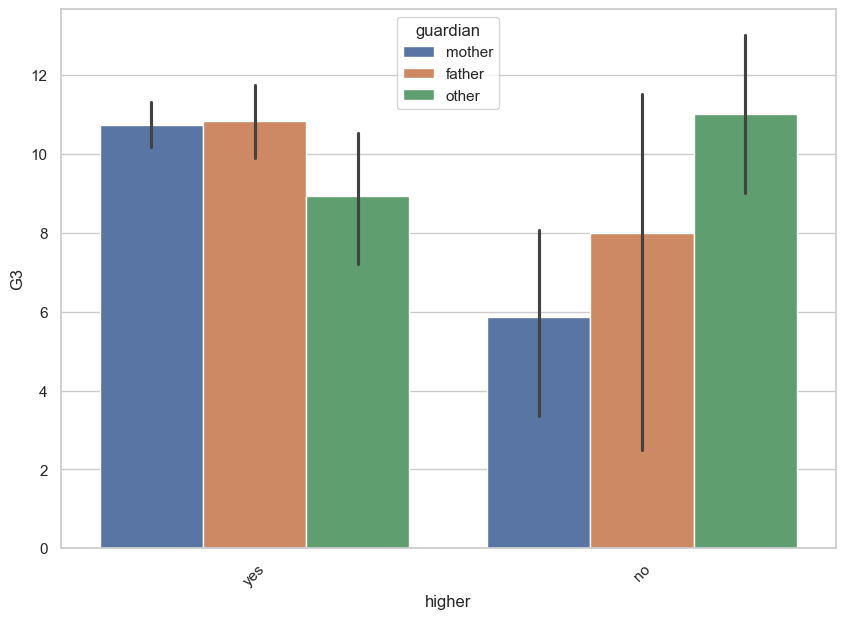

In [151]:
plt.figure(figsize=(10,7))
sns.barplot(x = "higher", y = "G3", hue = "guardian", data = df)
plt.xticks(rotation=45)
plt.show()

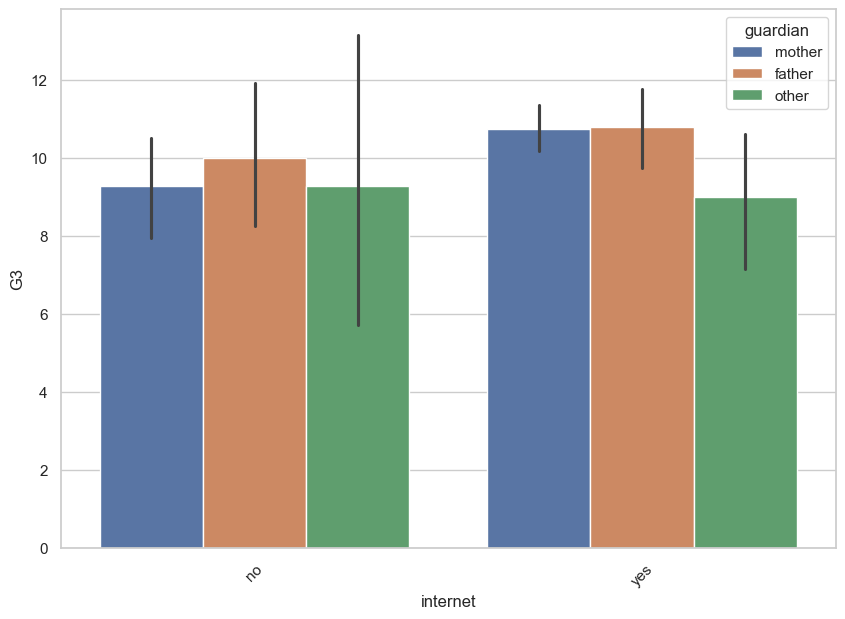

In [152]:
plt.figure(figsize=(10,7))
sns.barplot(x = "internet", y = "G3", hue = "guardian", data = df)
plt.xticks(rotation=45)
plt.show()

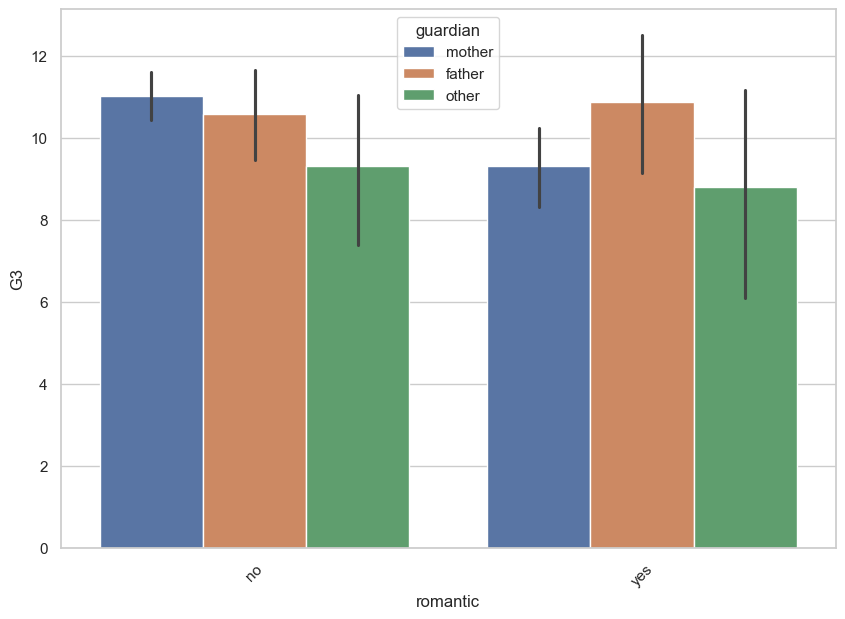

In [153]:
plt.figure(figsize=(10,7))
sns.barplot(x = "romantic", y = "G3", hue = "guardian", data = df)
plt.xticks(rotation=45)
plt.show()

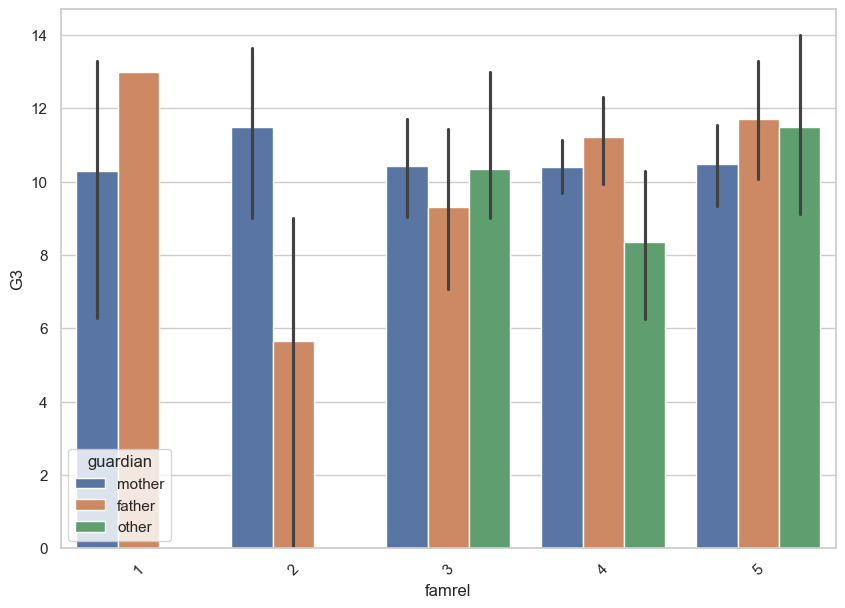

In [154]:
plt.figure(figsize=(10,7))
sns.barplot(x = "famrel", y = "G3", hue = "guardian", data = df)
plt.xticks(rotation=45)
plt.show()

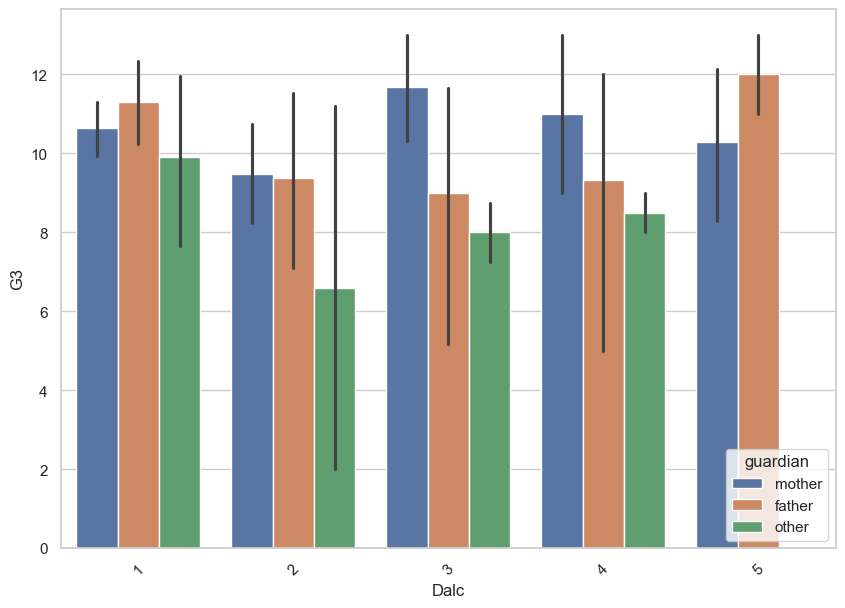

In [155]:
plt.figure(figsize=(10,7))
sns.barplot(x = "Dalc", y = "G3", hue = "guardian", data = df)
plt.xticks(rotation=45)
plt.show()

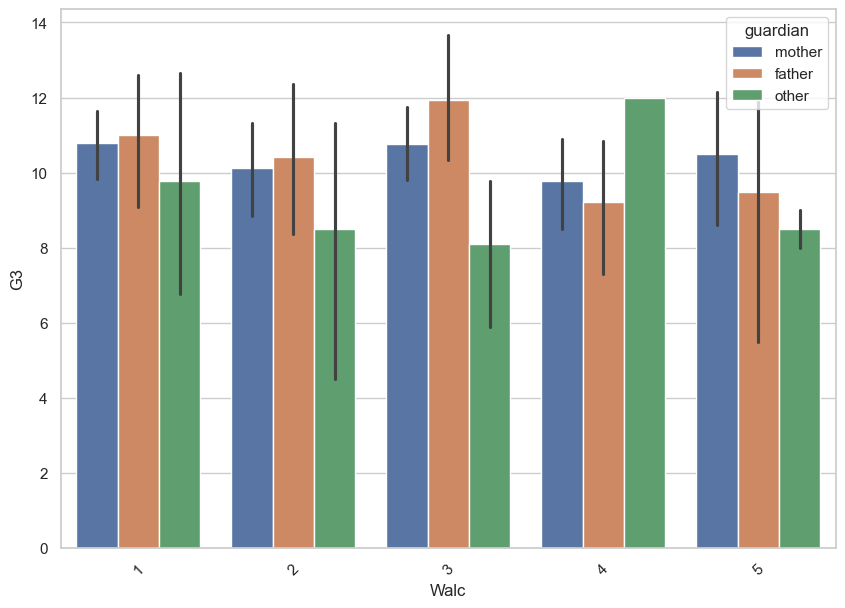

In [156]:
plt.figure(figsize=(10,7))
sns.barplot(x = "Walc", y = "G3", hue = "guardian", data = df)
plt.xticks(rotation=45)
plt.show()

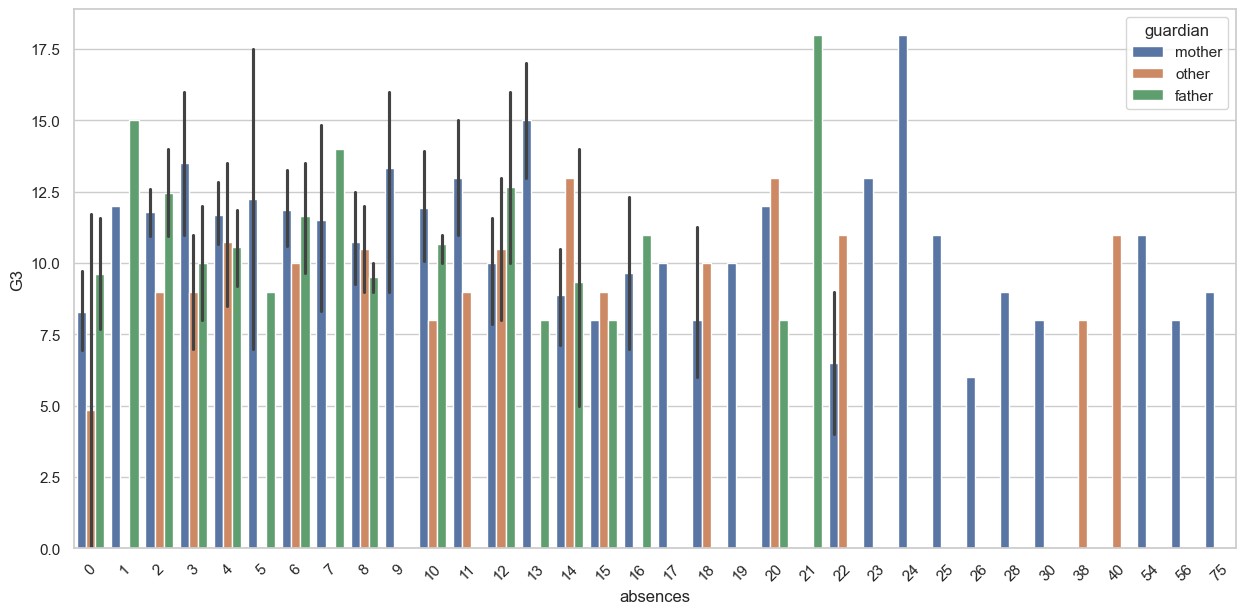

In [157]:
plt.figure(figsize=(15,7))
sns.barplot(x = "absences", y = "G3", hue = "guardian", data = df)
plt.xticks(rotation=45)
plt.show()